In [1]:
                                            #Author:Abhishek Shukla
                                        #Email:shuklaabhishek130@gmail.com
                                            #Contact-9619785527

In [2]:
# Import modules
%matplotlib inline
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from urllib.request import urlopen 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [3]:
#Loading the data into a dataframe

In [4]:
dummy_df = pd.read_csv('HR_Employee_Attrition_Data.csv')  #DataFrame for Employee_Attrition Data
names = list(dummy_df.columns) #list containing names of all the columns

In [5]:
dummy_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [30]:
#Creating a new data frame that has data only for the case where Attrition is Yes
lst1=list(dummy_df[dummy_df.Attrition=='Yes'].index)
df1=pd.DataFrame(data=dummy_df,index=lst1)
df1.head()

Age Attrition BusinessTravel  DailyRate              Department  \
0    41       Yes  Travel_Rarely       1102                   Sales   
2    37       Yes  Travel_Rarely       1373  Research & Development   
14   28       Yes  Travel_Rarely        103  Research & Development   
21   36       Yes  Travel_Rarely       1218                   Sales   
24   34       Yes  Travel_Rarely        699  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  \
0                  1          2  Life Sciences              1   
2                  2          2          Other              1   
14                24          3  Life Sciences              1   
21                 9          4  Life Sciences              1   
24                 6          1        Medical              1   

    EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                         2  Female          94               3         2   
2                         4    Male          92               2         1   
14                        3    Male          50               2         1   
21                        3    Male          82               2         1   
24                        2    Male          83               3         1   

                  JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0         Sales Executive                4        Single           5993   
2   Laboratory Technician                3        Single           2090   
14  Laboratory Technician                3        Single           2028   
21   Sales Representative                1        Single           3407   
24     Research Scientist                1        Single           2960   

    MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0         19479                   8      Y      Yes                 11   
2          2396                   6      Y      Yes                 15   
14        12947                   5      Y      Yes                 14   
21         6986                   7      Y       No                 23   
24        17102                   2      Y       No                 11   

    PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                   3                         1             80   
2                   3                         2             80   
14                  3                         2             80   
21                  4                         2             80   
24                  3                         3             80   

    StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                  0                  8                      0   
2                  0                  7                      3   
14                 0                  6                      4   
21                 0                 10                      4   
24                 0                  8                      2   

    WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                 1               6                   4   
2                 3               0                   0   
14                3               4                   2   
21                3               5                   3   
24                3               4                   2   

    YearsSinceLastPromotion  YearsWithCurrManager  
0                         0                     5  
2                         0                     0  
14                        0                     3  
21                        0                     3  
24                        1                     3

In [7]:
#Attrition is the dependent variable ie y

In [8]:
#Columns that do not seem to be important(not due to human bias) and therefore will be dropped are:EmployeeNumber
#Each employee has a unique ID or number and this in no way contributes to the decision on y, therefore the column 
#..is dropped

In [9]:
dummy_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
dummy_df.drop(columns='EmployeeNumber',inplace=True)

In [11]:
dummy_df.shape  #no. of columns are 34 so we will go with Decision Tree(>50 then RandomForest would have been used)

(2940, 34)

# Checking for null values

In [12]:
(dummy_df.isna().sum()*100)/(dummy_df.isna().count())

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

In [13]:
#There are no columns that can be eliminated by % null value. There are no null values in any of the columns. 
#...so further analysis related to null values is not required.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

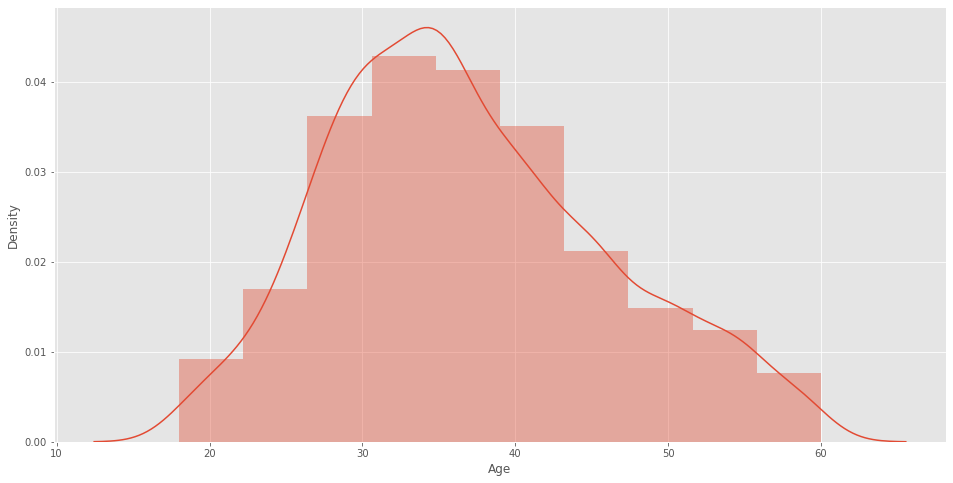

In [14]:
#plot the age distribution
plt.figure(figsize=(16,8))
sns.distplot(dummy_df['Age'],bins=10)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

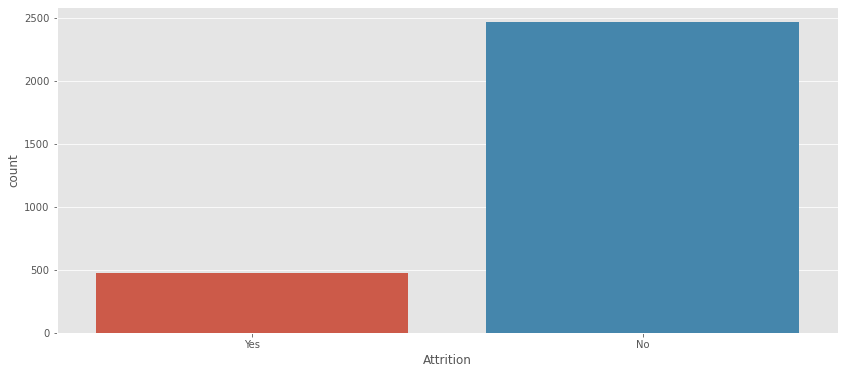

In [15]:
#plot the count of attrition
plt.figure(figsize=(14,6))
sns.countplot('Attrition',data=dummy_df)

In [37]:
#calculate attrition percentage
a=(df1['Attrition'].value_counts()/dummy_df['Attrition'].count())*100
print('Attrition % in the organization is: ',a)

Attrition % in the organization is:  Yes    16.122449
Name: Attrition, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

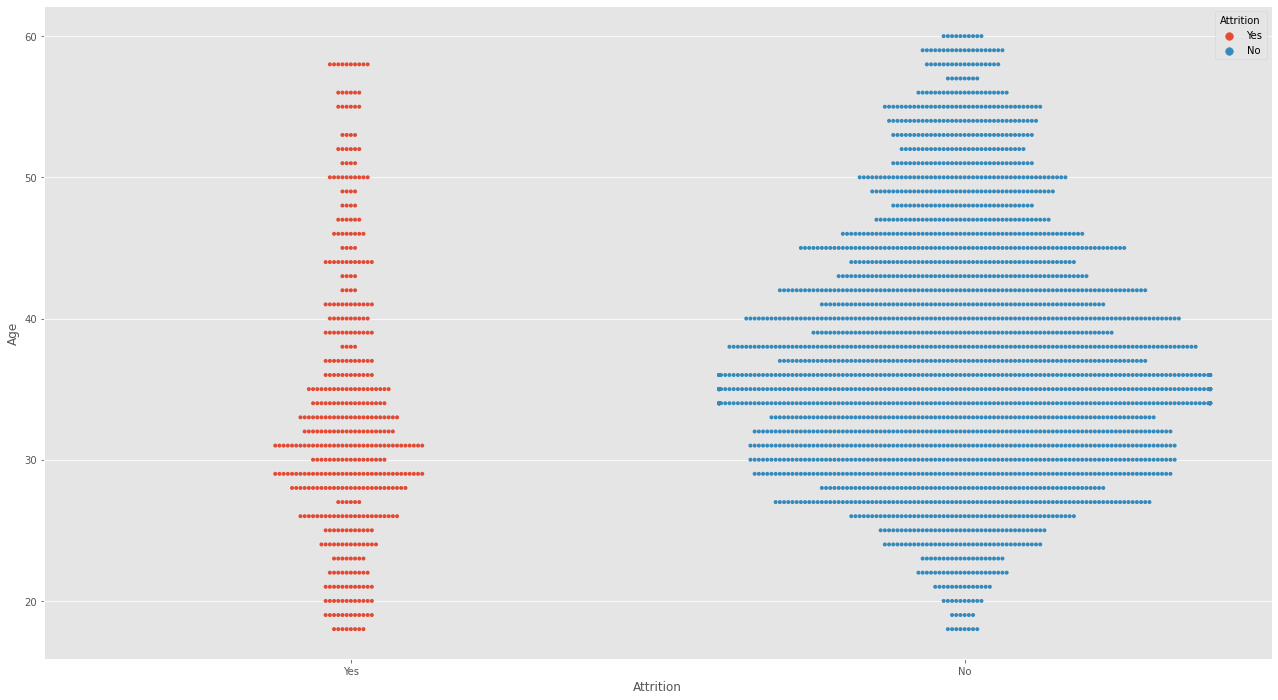

In [17]:
#Check if there is any relation between Age and Attrition
plt.figure(figsize=(22,12))
sns.swarmplot(y='Age',x='Attrition',data=dummy_df,hue='Attrition',size=4)

In [39]:
a=(df1[(df1.Age>24) &(df1.Age<36)].count()[0]/(df1['Age'].count()))*100                        
print('Attrition % corrsponding to age group 24-36: ',a)

Attrition % corrsponding to age group 24-36:  51.47679324894515


In [38]:
#Attrition % corrsponding to age group 24-36 is 51.5% 
#That is , more than half the attrition corresponds to people having 24-36 years of age

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

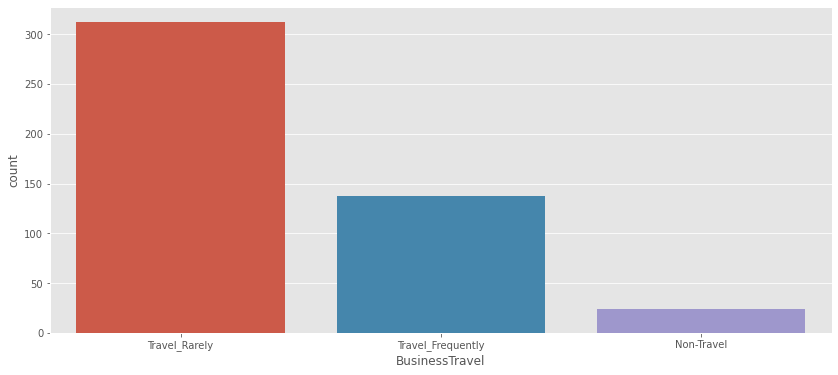

In [40]:
#plotting the count by business travel
plt.figure(figsize=(14,6))
sns.countplot(x='BusinessTravel',data=df1)

In [ ]:
#People Traveling rarely have more attrition numbers

In [41]:
a=(df1['BusinessTravel'].value_counts()['Travel_Rarely']/(dummy_df['BusinessTravel'].value_counts()['Travel_Rarely']))*100
print('Attrition % in Travel Rarely is: ',a)
b=(df1['BusinessTravel'].value_counts()['Travel_Frequently']/(dummy_df['BusinessTravel'].value_counts()['Travel_Frequently']))*100
print('Attrition % in Travel Frequently: ',b)
c=(df1['BusinessTravel'].value_counts()['Non-Travel']/(dummy_df['BusinessTravel'].value_counts()['Non-Travel']))*100
print('Attrition % in non-travel is: ',c)

Attrition % in Travel Rarely is:  14.956855225311601
Attrition % in Travel Frequently:  24.90974729241877
Attrition % in non-travel is:  8.0


In [ ]:
#therefore people traveling freq have higher attrition % among themselves

In [ ]:
#Attrition % in different department

<AxesSubplot:xlabel='Department', ylabel='count'>

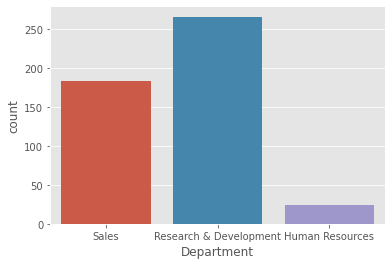

In [42]:
sns.countplot(x='Department',data=df1)
#Attrition is more in Research&Development Department

In [43]:
a=(df1['Department'].value_counts()['Sales']/(dummy_df['Department'].value_counts()['Sales']))*100
print('Attrition % in the Sales is: ',a)
b=(df1['Department'].value_counts()['Research & Development']/(dummy_df['Department'].value_counts()['Research & Development']))*100
print('Attrition % in the R&D is: ',b)
c=(df1['Department'].value_counts()['Human Resources']/(dummy_df['Department'].value_counts()['Human Resources']))*100
print('Attrition % in the HR is: ',c)

Attrition % in the Sales is:  20.62780269058296
Attrition % in the R&D is:  13.839750260145681
Attrition % in the HR is:  19.047619047619047


In [ ]:
#Therefore Attrition number  is highest in R&D but Attrition % is more in Sales and HR
#So employees in Sales and HR have more chances of undergoing Attrition

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

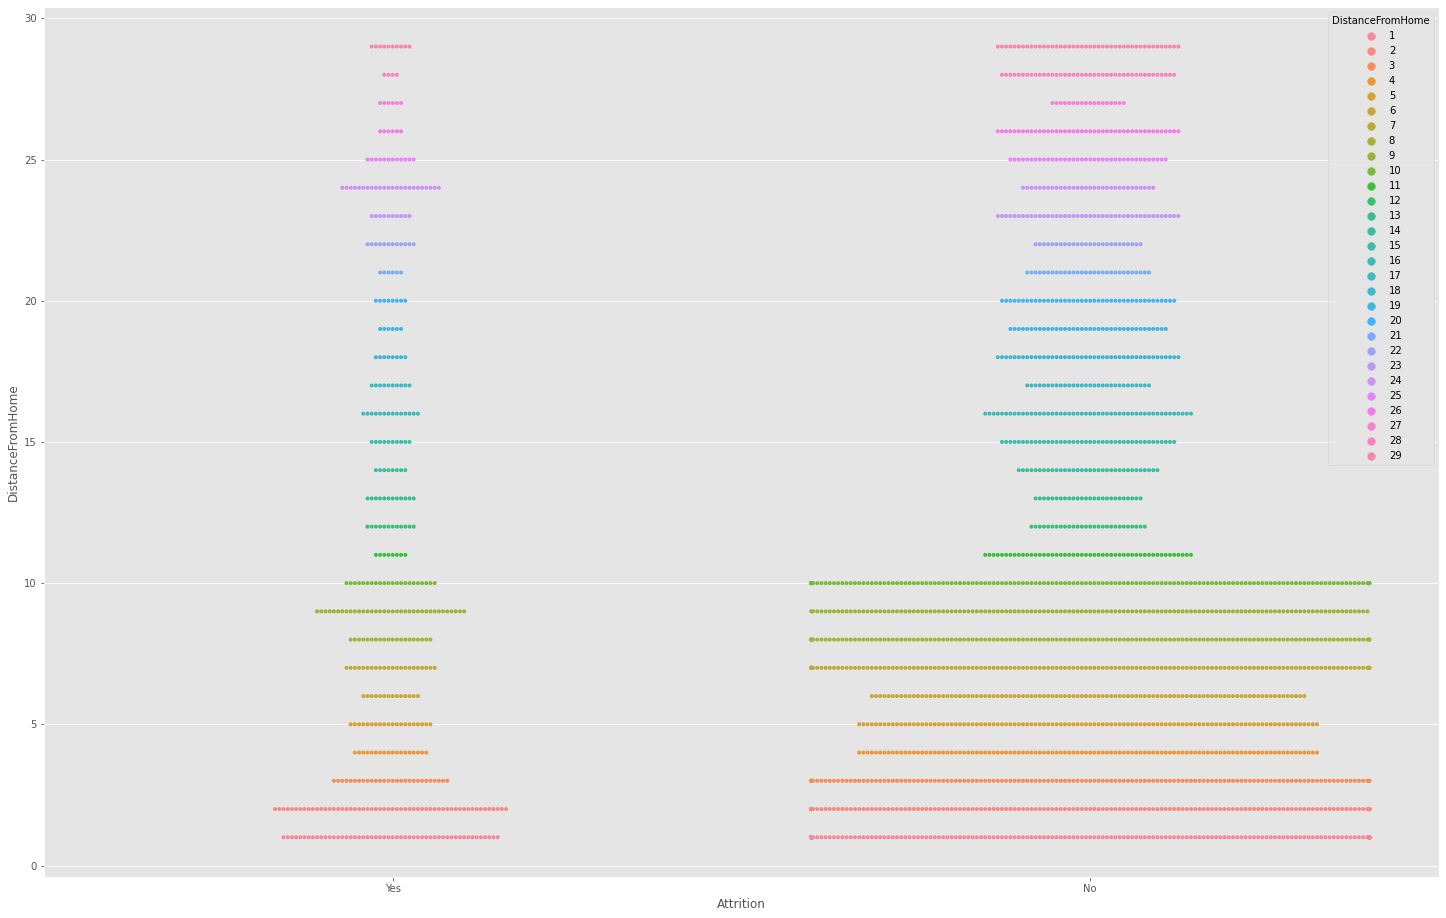

In [47]:
#Plotting attrition for Distance from home 
plt.figure(figsize=(25,16))
sns.swarmplot(x='Attrition',y='DistanceFromHome',hue='DistanceFromHome',data=dummy_df,size=4)

In [ ]:
#From the plot we can say There is more attrition when Distance from home is less

<AxesSubplot:xlabel='Education', ylabel='count'>

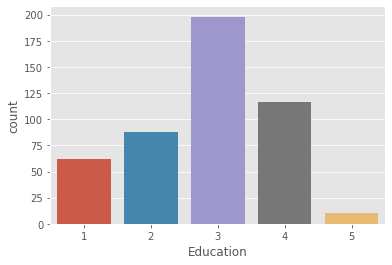

In [31]:
sns.countplot(x='Education',data=df1)

In [32]:
#Attrition is highest for people with Education =3 

In [33]:
a=(df1['Education'].value_counts()[1]/(dummy_df['Education'].value_counts()[1]))*100
print('Attrition % in 1 is: ',a)
b=(df1['Education'].value_counts()[2]/(dummy_df['Education'].value_counts()[2]))*100
print('Attrition % in 2 is: ',b)
c=(df1['Education'].value_counts()[3]/(dummy_df['Education'].value_counts()[3]))*100
print('Attrition % in 3 is: ',c)
d=(df1['Education'].value_counts()[4]/(dummy_df['Education'].value_counts()[4]))*100
print('Attrition % in 4 is: ',d)


Attrition % in 1 is:  18.235294117647058
Attrition % in 2 is:  15.602836879432624
Attrition % in 3 is:  17.307692307692307
Attrition % in 4 is:  14.572864321608039


In [ ]:
#Attrition % is highest among Education as 1

<AxesSubplot:xlabel='EducationField', ylabel='count'>

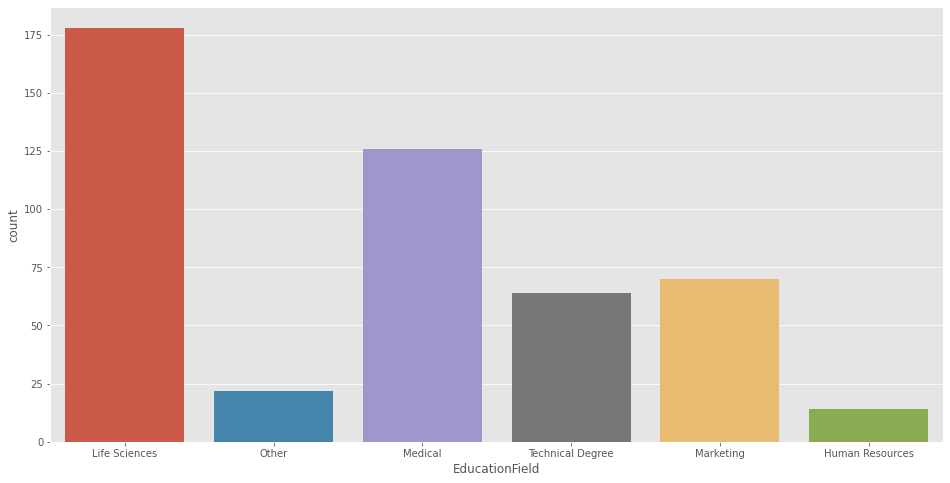

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(x='EducationField',data=df1)

In [36]:
a=(df1['EducationField'].value_counts()['Life Sciences']/(dummy_df['EducationField'].value_counts()['Life Sciences']))*100
print('Attrition % in Life Sciences is: ',a)
b=(df1['EducationField'].value_counts()['Other']/(dummy_df['EducationField'].value_counts()['Other']))*100
print('Attrition % in Other is: ',b)
c=(df1['EducationField'].value_counts()['Medical']/(dummy_df['EducationField'].value_counts()['Medical']))*100
print('Attrition % in Medical is: ',c)
d=(df1['EducationField'].value_counts()['Technical Degree']/(dummy_df['EducationField'].value_counts()['Technical Degree']))*100
print('Attrition % in the Technical is: ',d)
e=(df1['EducationField'].value_counts()['Marketing']/(dummy_df['EducationField'].value_counts()['Marketing']))*100
print('Attrition % in the Marketing is: ',e)
f=(df1['EducationField'].value_counts()['Human Resources']/(dummy_df['EducationField'].value_counts()['Human Resources']))*100
print('Attrition % in the HR is: ',f)

Attrition % in Life Sciences is:  14.686468646864686
Attrition % in Other is:  13.414634146341465
Attrition % in Medical is:  13.577586206896552
Attrition % in the Technical is:  24.242424242424242
Attrition % in the Marketing is:  22.0125786163522
Attrition % in the HR is:  25.925925925925924


In [ ]:
#Attrition numbers are max for
#Attrion % is highest among employees with Education Field HR and Technical (25%)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

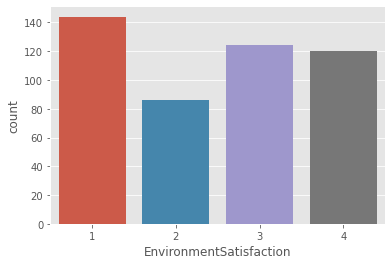

In [34]:
sns.countplot(x='EnvironmentSatisfaction',data=df1)

In [ ]:
a=(df1['EnvironmentSatisfaction'].value_counts()[1]/(dummy_df['EnvironmentSatisfaction'].value_counts()[1]))*100
print('Attrition % in 1 is: ',a)
b=(df1['EnvironmentSatisfaction'].value_counts()[2]/(dummy_df['EnvironmentSatisfaction'].value_counts()[2]))*100
print('Attrition % 2 is: ',b)
c=(df1['EnvironmentSatisfaction'].value_counts()[3]/(dummy_df['EnvironmentSatisfaction'].value_counts()[3]))*100
print('Attrition % 3 is: ',c)
d=(df1['EnvironmentSatisfaction'].value_counts()[4]/(dummy_df['EnvironmentSatisfaction'].value_counts()[4]))*100
print('Attrition % 4 is: ',d)

In [ ]:
#Least Environment Satisfied people have more chances of undergoing attrition

<AxesSubplot:xlabel='Gender', ylabel='count'>

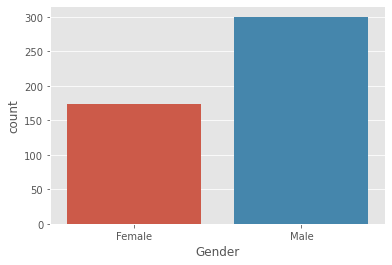

In [35]:
sns.countplot(x='Gender',data=df1)

In [49]:
#%attrition Gender wise
a=(df1['Gender'].value_counts()['Male']/(dummy_df['Gender'].value_counts()['Male']))*100
print('Attrition % in the Male is: ',a)
b=(df1['Gender'].value_counts()['Female']/(dummy_df['Gender'].value_counts()['Female']))*100
print('Attrition % in the Female is: ',b)

Attrition % in the Male is:  17.006802721088434
Attrition % in the Female is:  14.795918367346939


In [ ]:
#Therefore Attrition % as well as Attrition number both are higher for Males
#So Male Employees have higher chances of undergoin attrition

In [ ]:
'JobInvolvement','JobLevel', 'JobRole', 'JobSatisfaction'

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

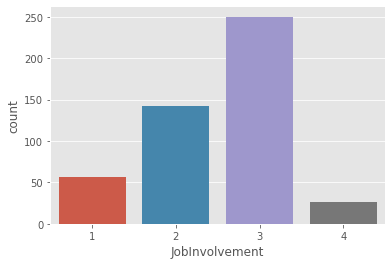

In [50]:
sns.countplot(x='JobInvolvement',data=df1)

In [59]:
#Attrition % wrt JobLevel
a=(df1['JobInvolvement'].value_counts()[1]/(dummy_df['JobInvolvement'].value_counts()[1]))*100
print('Attrition % in Job Involvement 1 is: ',a)
b=(df1['JobInvolvement'].value_counts()[2]/(dummy_df['JobInvolvement'].value_counts()[2]))*100
print('Attrition % in Job Involvement 2 is: ',b)
c=(df1['JobInvolvement'].value_counts()[3]/(dummy_df['JobInvolvement'].value_counts()[3]))*100
print('Attrition % in Job Involvement 3 is: ',c)
d=(df1['JobInvolvement'].value_counts()[4]/(dummy_df['JobInvolvement'].value_counts()[4]))*100
print('Attrition % in Job Involvement 4 is: ',d)

Attrition % in Job Involvement 1 is:  33.734939759036145
Attrition % in Job Involvement 2 is:  18.933333333333334
Attrition % in Job Involvement 3 is:  14.400921658986174
Attrition % in Job Involvement 4 is:  9.027777777777777


In [ ]:
#So employees with least job invovement has highest Attrition %

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

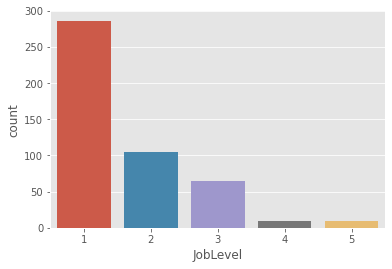

In [51]:
sns.countplot(x='JobLevel',data=df1)

In [57]:
#Attrition % wrt JobLevel
a=(df1['JobLevel'].value_counts()[1]/(dummy_df['JobLevel'].value_counts()[1]))*100
print('Attrition % in Job level 1 is: ',a)
b=(df1['JobLevel'].value_counts()[2]/(dummy_df['JobLevel'].value_counts()[2]))*100
print('Attrition % in Job level 2 is: ',b)
c=(df1['JobLevel'].value_counts()[3]/(dummy_df['JobLevel'].value_counts()[3]))*100
print('Attrition % in Job level 3 is: ',c)
d=(df1['JobLevel'].value_counts()[4]/(dummy_df['JobLevel'].value_counts()[4]))*100
print('Attrition % in Job level 4 is: ',d)

Attrition % in Job level 1 is:  26.335174953959484
Attrition % in Job level 2 is:  9.737827715355806
Attrition % in Job level 3 is:  14.678899082568808
Attrition % in Job level 4 is:  4.716981132075472


In [ ]:
#Therefore Employees at Job Level 1 have highest Attrition

<AxesSubplot:xlabel='JobRole', ylabel='count'>

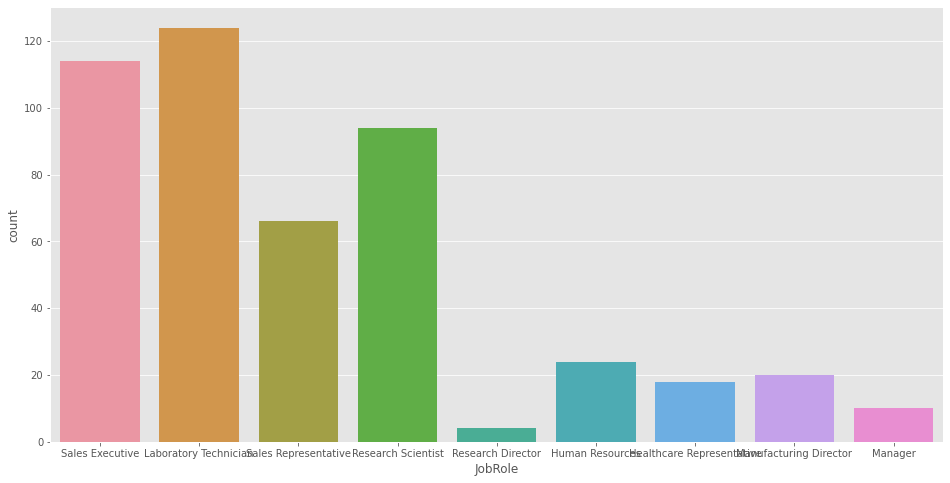

In [55]:
plt.figure(figsize=(16,8))
sns.countplot(x='JobRole',data=df1)

In [ ]:
#Employees with JobRoles as Sales Executive,Lab Technicians,Research Scientist have highest attrition rates

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

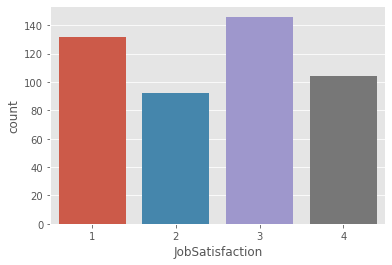

In [53]:
sns.countplot(x='JobSatisfaction',data=df1)

In [54]:
#Attrition % wrt JobSatisfaction
a=(df1['JobSatisfaction'].value_counts()[1]/(dummy_df['JobSatisfaction'].value_counts()[1]))*100
print('Attrition % in Satisfaction level 1 is: ',a)
a=(df1['JobSatisfaction'].value_counts()[2]/(dummy_df['JobSatisfaction'].value_counts()[2]))*100
print('Attrition % in Satisfaction level 2 is: ',a)
a=(df1['JobSatisfaction'].value_counts()[3]/(dummy_df['JobSatisfaction'].value_counts()[3]))*100
print('Attrition % in Satisfaction level 3 is: ',a)
a=(df1['JobSatisfaction'].value_counts()[4]/(dummy_df['JobSatisfaction'].value_counts()[4]))*100
print('Attrition % in Satisfaction level 4 is: ',a)

Attrition % in Satisfaction level 1 is:  22.837370242214533
Attrition % in Satisfaction level 2 is:  16.428571428571427
Attrition % in Satisfaction level 3 is:  16.515837104072396
Attrition % in Satisfaction level 4 is:  11.328976034858387


In [ ]:
#So we can conclude that % Attrition is highest for employees with least Job Satisfaction Level

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

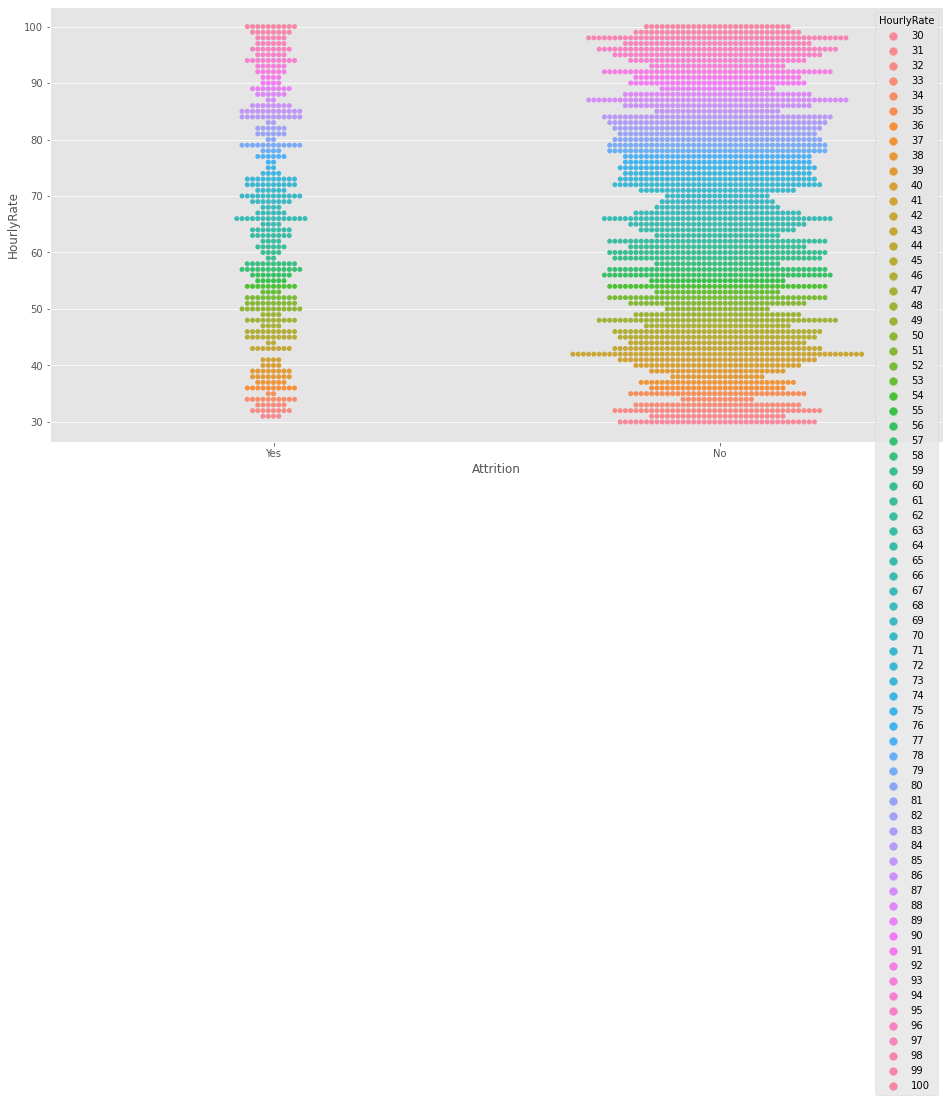

In [61]:
#Plotting attrition for HourlyRate
plt.figure(figsize=(16,8))
sns.swarmplot(x='Attrition',y='HourlyRate',hue='HourlyRate',data=dummy_df)

In [ ]:
#there is no relation at all between hourly rate and attrition

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

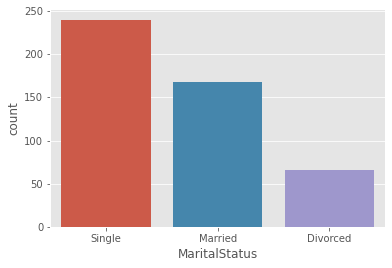

In [62]:
 
#plt.figure(figsize=(16,8))
sns.countplot(x='MaritalStatus',data=df1)

In [ ]:
#Attrition is highest in employees who are single

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

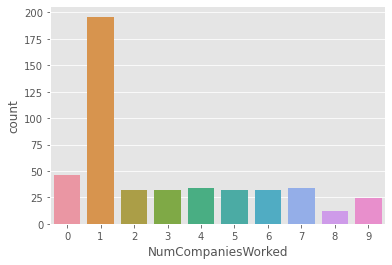

In [63]:
sns.countplot(x='NumCompaniesWorked',data=df1)

In [ ]:
#People having worked in just one company have highest Attrition rate

<AxesSubplot:xlabel='Over18', ylabel='count'>

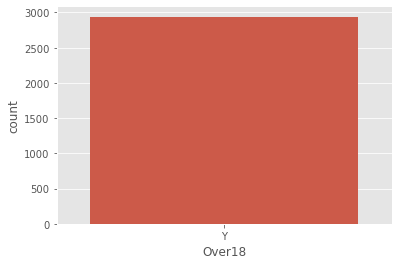

In [65]:
sns.countplot(x='Over18',data=dummy_df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

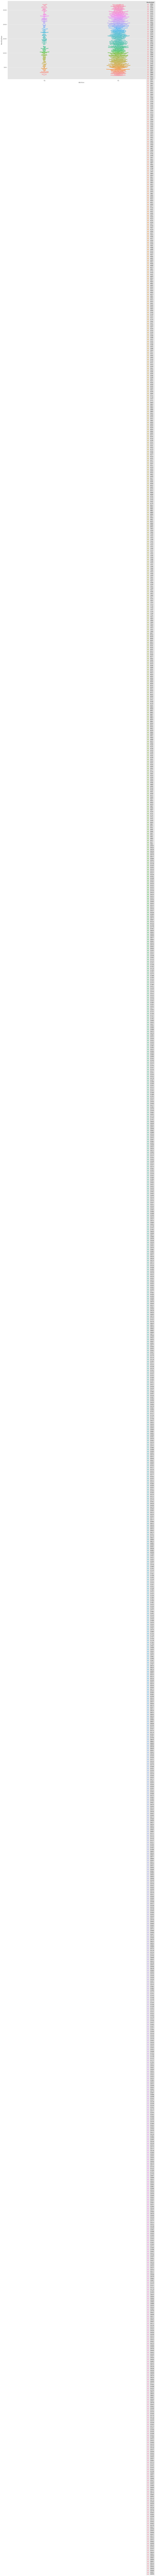

In [68]:
#Plotting attrition for MonthlyRate
plt.figure(figsize=(22,12))
sns.swarmplot(x='Attrition',y='MonthlyRate',hue='MonthlyRate',data=dummy_df)

In [ ]:
#No conclusion from above plot

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

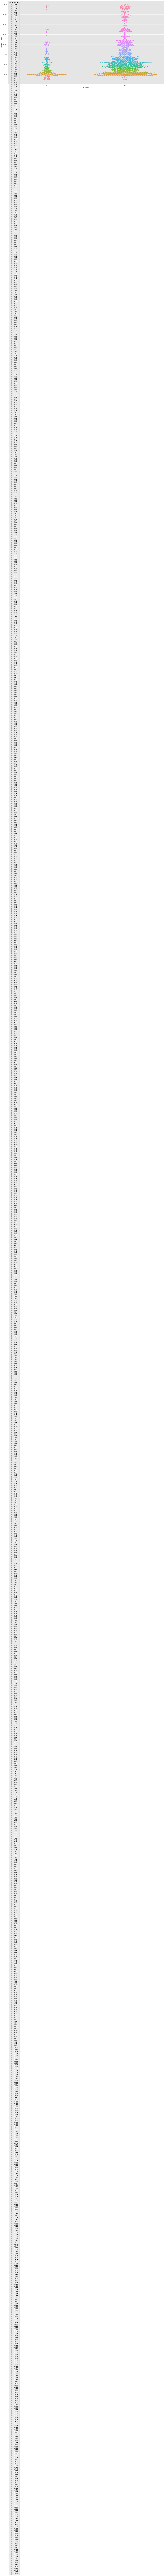

In [67]:
#Plotting attrition for MonthlyIncome
plt.figure(figsize=(22,12))
sns.swarmplot(x='Attrition',y='MonthlyIncome',hue='MonthlyIncome',data=dummy_df)

In [ ]:
#Employees with low monthly income(less than 6000) have highest attrition

In [ ]:
#*********************************************************************************************************
#Columns covered as of now for insights:
#'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome'
#'Education', 'EducationField','EnvironmentSatisfaction', 'Gender'
#'HourlyRate', 'JobInvolvement','JobLevel', 'JobRole', 'JobSatisfaction',
#'MaritalStatus','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
#'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction'
#'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
#'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

<AxesSubplot:xlabel='OverTime', ylabel='count'>

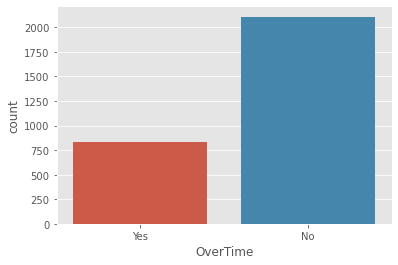

In [69]:
sns.countplot(x='OverTime',data=dummy_df)


<AxesSubplot:xlabel='OverTime', ylabel='count'>

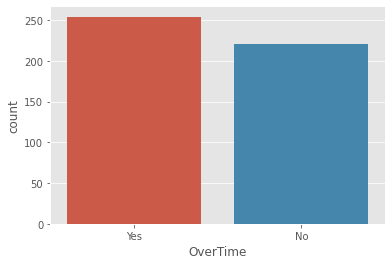

In [70]:
sns.countplot(x='OverTime',data=df1)

In [71]:
#% Attrition in employees with overtime
a=(df1['OverTime'].value_counts()['Yes']/(dummy_df['OverTime'].value_counts()['Yes']))*100
print('Attrition % in Employees with OverTime is: ',a)
b=(df1['OverTime'].value_counts()['No']/(dummy_df['OverTime'].value_counts()['No']))*100
print('Attrition % in Employees without OverTime  is: ',b)


Attrition % in Employees with OverTime is:  30.528846153846157
Attrition % in Employees without OverTime  is:  10.436432637571158


In [ ]:
#Clearly, employees with overtime have more attrition rate

In [ ]:
#Plotting attrition for PercentageSalaryHike
plt.figure(figsize=(22,12))
sns.swarmplot(x='Attrition',y='MonthlyIncome',hue='MonthlyIncome',data=dummy_df)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

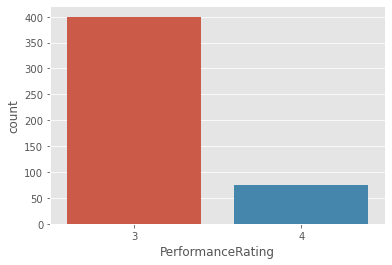

In [72]:
sns.countplot(x='PerformanceRating',data=df1)

In [ ]:
#Employees with Rating of 3 have maximum attrition

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

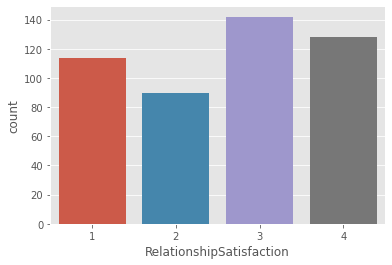

In [73]:
sns.countplot(x='RelationshipSatisfaction',data=df1)

In [ ]:
#No direct conclusion

In [75]:
#% Attrition in employees with RelationshipSatisfaction
a=(df1['RelationshipSatisfaction'].value_counts()[1]/(dummy_df['RelationshipSatisfaction'].value_counts()[1]))*100
print('Attrition % in Employees with RelationshipSatisfaction 1 is: ',a)
b=(df1['RelationshipSatisfaction'].value_counts()[2]/(dummy_df['RelationshipSatisfaction'].value_counts()[2]))*100
print('Attrition % in Employees with RelationshipSatisfaction 2 is: ',b)
c=(df1['RelationshipSatisfaction'].value_counts()[3]/(dummy_df['RelationshipSatisfaction'].value_counts()[3]))*100
print('Attrition % in Employees with RelationshipSatisfaction 3 is: ',c)
d=(df1['RelationshipSatisfaction'].value_counts()[4]/(dummy_df['RelationshipSatisfaction'].value_counts()[4]))*100
print('Attrition % in Employees with RelationshipSatisfaction 4 is: ',d)

Attrition % in Employees with RelationshipSatisfaction 1 is:  20.652173913043477
Attrition % in Employees with RelationshipSatisfaction 2 is:  14.85148514851485
Attrition % in Employees with RelationshipSatisfaction 3 is:  15.468409586056644
Attrition % in Employees with RelationshipSatisfaction 4 is:  14.814814814814813


In [ ]:
#Attrition % is max for employees with Relationship Satifaction Level 1

In [ ]:
#'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance'

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='StandardHours', ylabel='Density'>

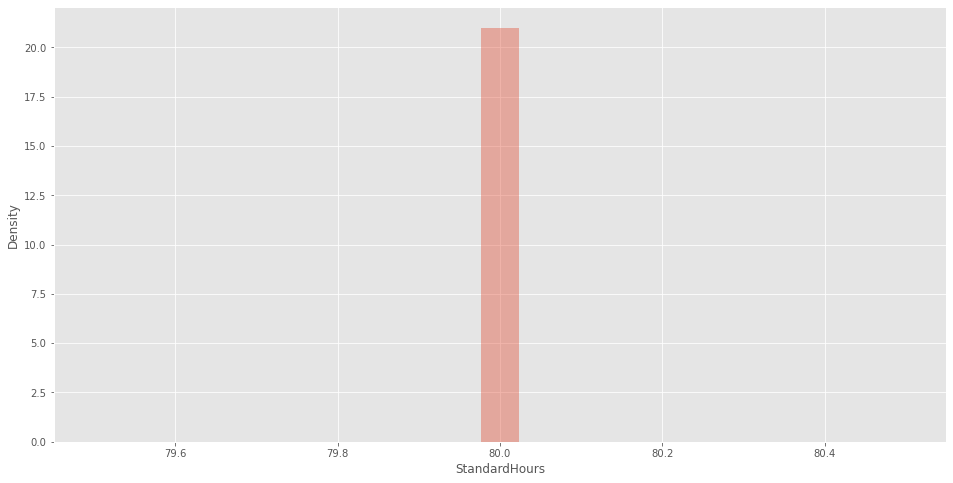

In [78]:
#Plotting attrition for StandardHours
plt.figure(figsize=(16,8))
sns.distplot(df1['StandardHours'])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

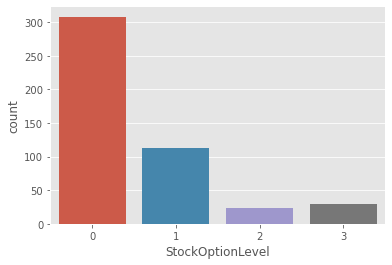

In [77]:
sns.countplot(x='StockOptionLevel',data=df1)

In [ ]:
#Employees with StockOptionLevel 0 have max attrition

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

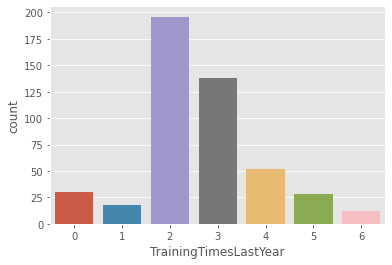

In [79]:
sns.countplot(x='TrainingTimesLastYear',data=df1)

In [80]:
#% Attrition in employees with TrainingTimesLastYear
a=(df1['TrainingTimesLastYear'].value_counts()[0]/(dummy_df['TrainingTimesLastYear'].value_counts()[0]))*100
print('Attrition % in Employees with TrainingTimesLastYear 0 is: ',a)
b=(df1['TrainingTimesLastYear'].value_counts()[1]/(dummy_df['TrainingTimesLastYear'].value_counts()[1]))*100
print('Attrition % in Employees with TrainingTimesLastYear 1 is: ',b)
c=(df1['TrainingTimesLastYear'].value_counts()[2]/(dummy_df['TrainingTimesLastYear'].value_counts()[2]))*100
print('Attrition % in Employees with TrainingTimesLastYear 2 is: ',c)
d=(df1['TrainingTimesLastYear'].value_counts()[3]/(dummy_df['TrainingTimesLastYear'].value_counts()[3]))*100
print('Attrition % in Employees with TrainingTimesLastYear 3 is: ',d)
e=(df1['TrainingTimesLastYear'].value_counts()[4]/(dummy_df['TrainingTimesLastYear'].value_counts()[4]))*100
print('Attrition % in Employees with TrainingTimesLastYear 4 is: ',d)
f=(df1['TrainingTimesLastYear'].value_counts()[5]/(dummy_df['TrainingTimesLastYear'].value_counts()[5]))*100
print('Attrition % in Employees with TrainingTimesLastYear 5 is: ',d)
g=(df1['TrainingTimesLastYear'].value_counts()[6]/(dummy_df['TrainingTimesLastYear'].value_counts()[6]))*100
print('Attrition % in Employees with TrainingTimesLastYear 6 is: ',d)

Attrition % in Employees with TrainingTimesLastYear 0 is:  27.77777777777778
Attrition % in Employees with TrainingTimesLastYear 1 is:  12.676056338028168
Attrition % in Employees with TrainingTimesLastYear 2 is:  17.915904936014627
Attrition % in Employees with TrainingTimesLastYear 3 is:  14.052953156822811
Attrition % in Employees with TrainingTimesLastYear 4 is:  14.052953156822811
Attrition % in Employees with TrainingTimesLastYear 5 is:  14.052953156822811
Attrition % in Employees with TrainingTimesLastYear 6 is:  14.052953156822811


In [ ]:
#Employees with 0 Trainings in last year have max attrition

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

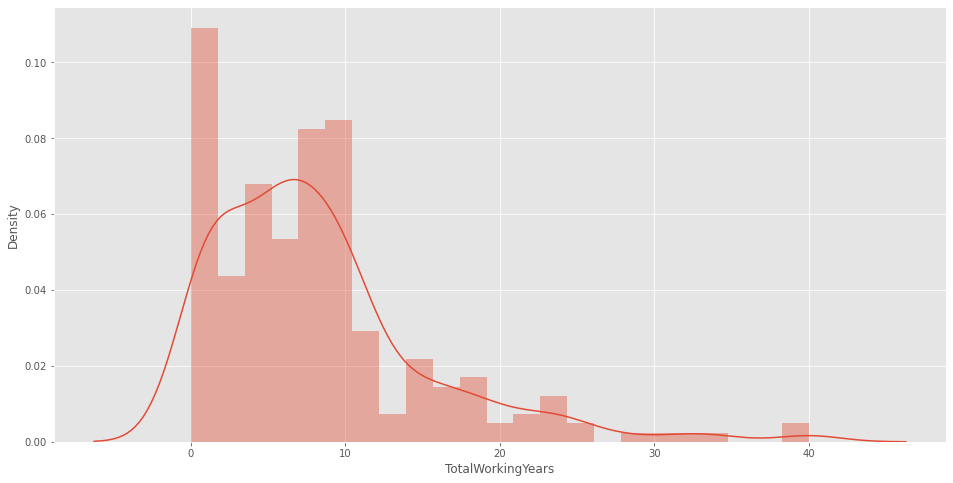

In [81]:
plt.figure(figsize=(16,8))
sns.distplot(df1['TotalWorkingYears'])

In [ ]:
#Employees with less than 10 years of experience have highest attrition

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

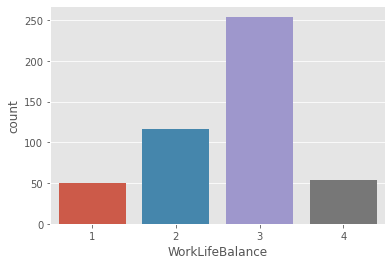

In [82]:
sns.countplot(x='WorkLifeBalance',data=df1)

In [83]:
a=(df1['WorkLifeBalance'].value_counts()[1]/(dummy_df['WorkLifeBalance'].value_counts()[1]))*100
print('Attrition % in Employees with WorkLifeBalance 1 is: ',a)
b=(df1['WorkLifeBalance'].value_counts()[2]/(dummy_df['WorkLifeBalance'].value_counts()[2]))*100
print('Attrition % in Employees with WorkLifeBalance 2 is: ',b)
c=(df1['WorkLifeBalance'].value_counts()[3]/(dummy_df['WorkLifeBalance'].value_counts()[3]))*100
print('Attrition % in Employees with WorkLifeBalance 3 is: ',c)
d=(df1['WorkLifeBalance'].value_counts()[4]/(dummy_df['WorkLifeBalance'].value_counts()[4]))*100
print('Attrition % in Employees with WorkLifeBalance 4 is: ',d)

Attrition % in Employees with WorkLifeBalance 1 is:  31.25
Attrition % in Employees with WorkLifeBalance 2 is:  16.86046511627907
Attrition % in Employees with WorkLifeBalance 3 is:  14.221724524076148
Attrition % in Employees with WorkLifeBalance 4 is:  17.647058823529413


In [ ]:
#Although there are more number of employees under attrition with work life balance 3, but % attrition is max for
#employees with Worklifebalance 1

In [ ]:
#'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

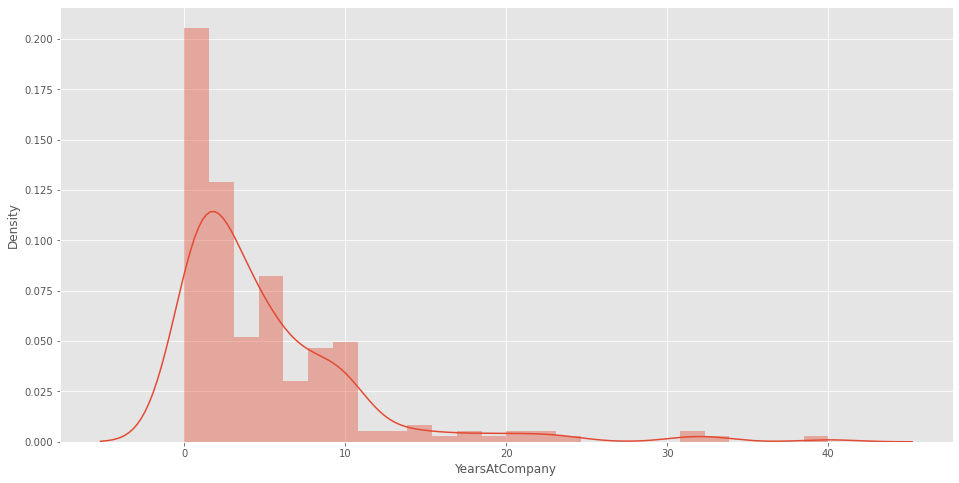

In [84]:
plt.figure(figsize=(16,8))
sns.distplot(df1['YearsAtCompany'])

In [ ]:
#employees with less than 5 years at the company have max attrition

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

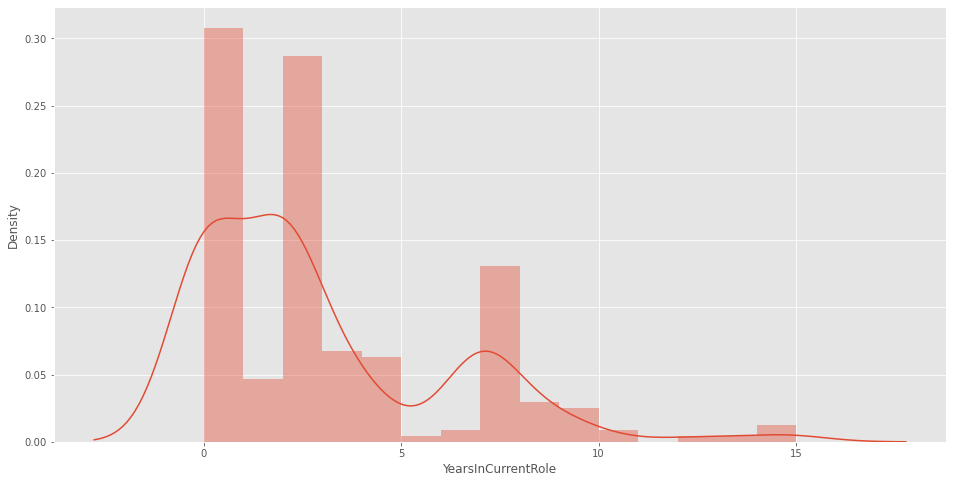

In [85]:
plt.figure(figsize=(16,8))
sns.distplot(df1['YearsInCurrentRole'])

In [ ]:
#there are more employees under3 years in current role who have undergone attrition

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

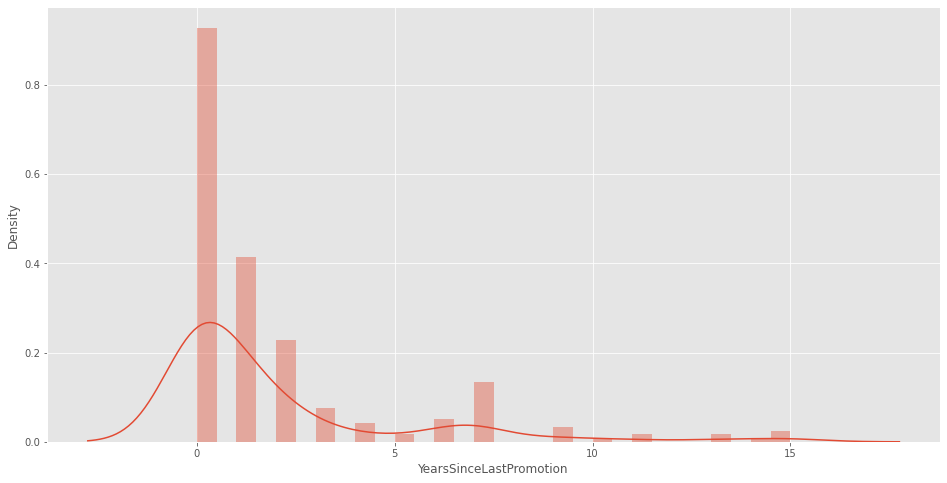

In [86]:
plt.figure(figsize=(16,8))
sns.distplot(df1['YearsSinceLastPromotion'])

In [87]:
#more no. Employees who have just been promoted have undergone attrition 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

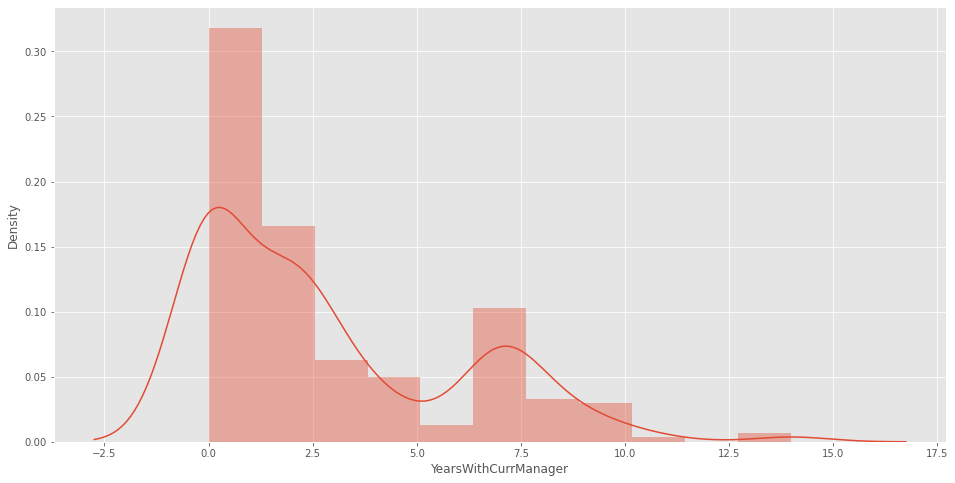

In [88]:
plt.figure(figsize=(16,8))
sns.distplot(df1['YearsWithCurrManager'])

In [ ]:
#more attrition for employees under 2.5 years with current manager

# Let us check for outliers

In [89]:
dummy_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  2940.000000  2940.000000       2940.000000  2940.000000         2940.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.133819   403.440447          8.105485     1.023991            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      2940.000000    2940.000000   2940.000000         2940.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102658    4707.155770   7116.575021            2.497584   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8045.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8380.000000  20462.000000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        2940.000000        2940.000000               2940.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659315           0.360762                  1.081025   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         2940.0       2940.000000        2940.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.851932           7.779458   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            2940.000000      2940.000000     2940.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289051         0.706356        6.125483   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         2940.000000              2940.000000     

<AxesSubplot:>

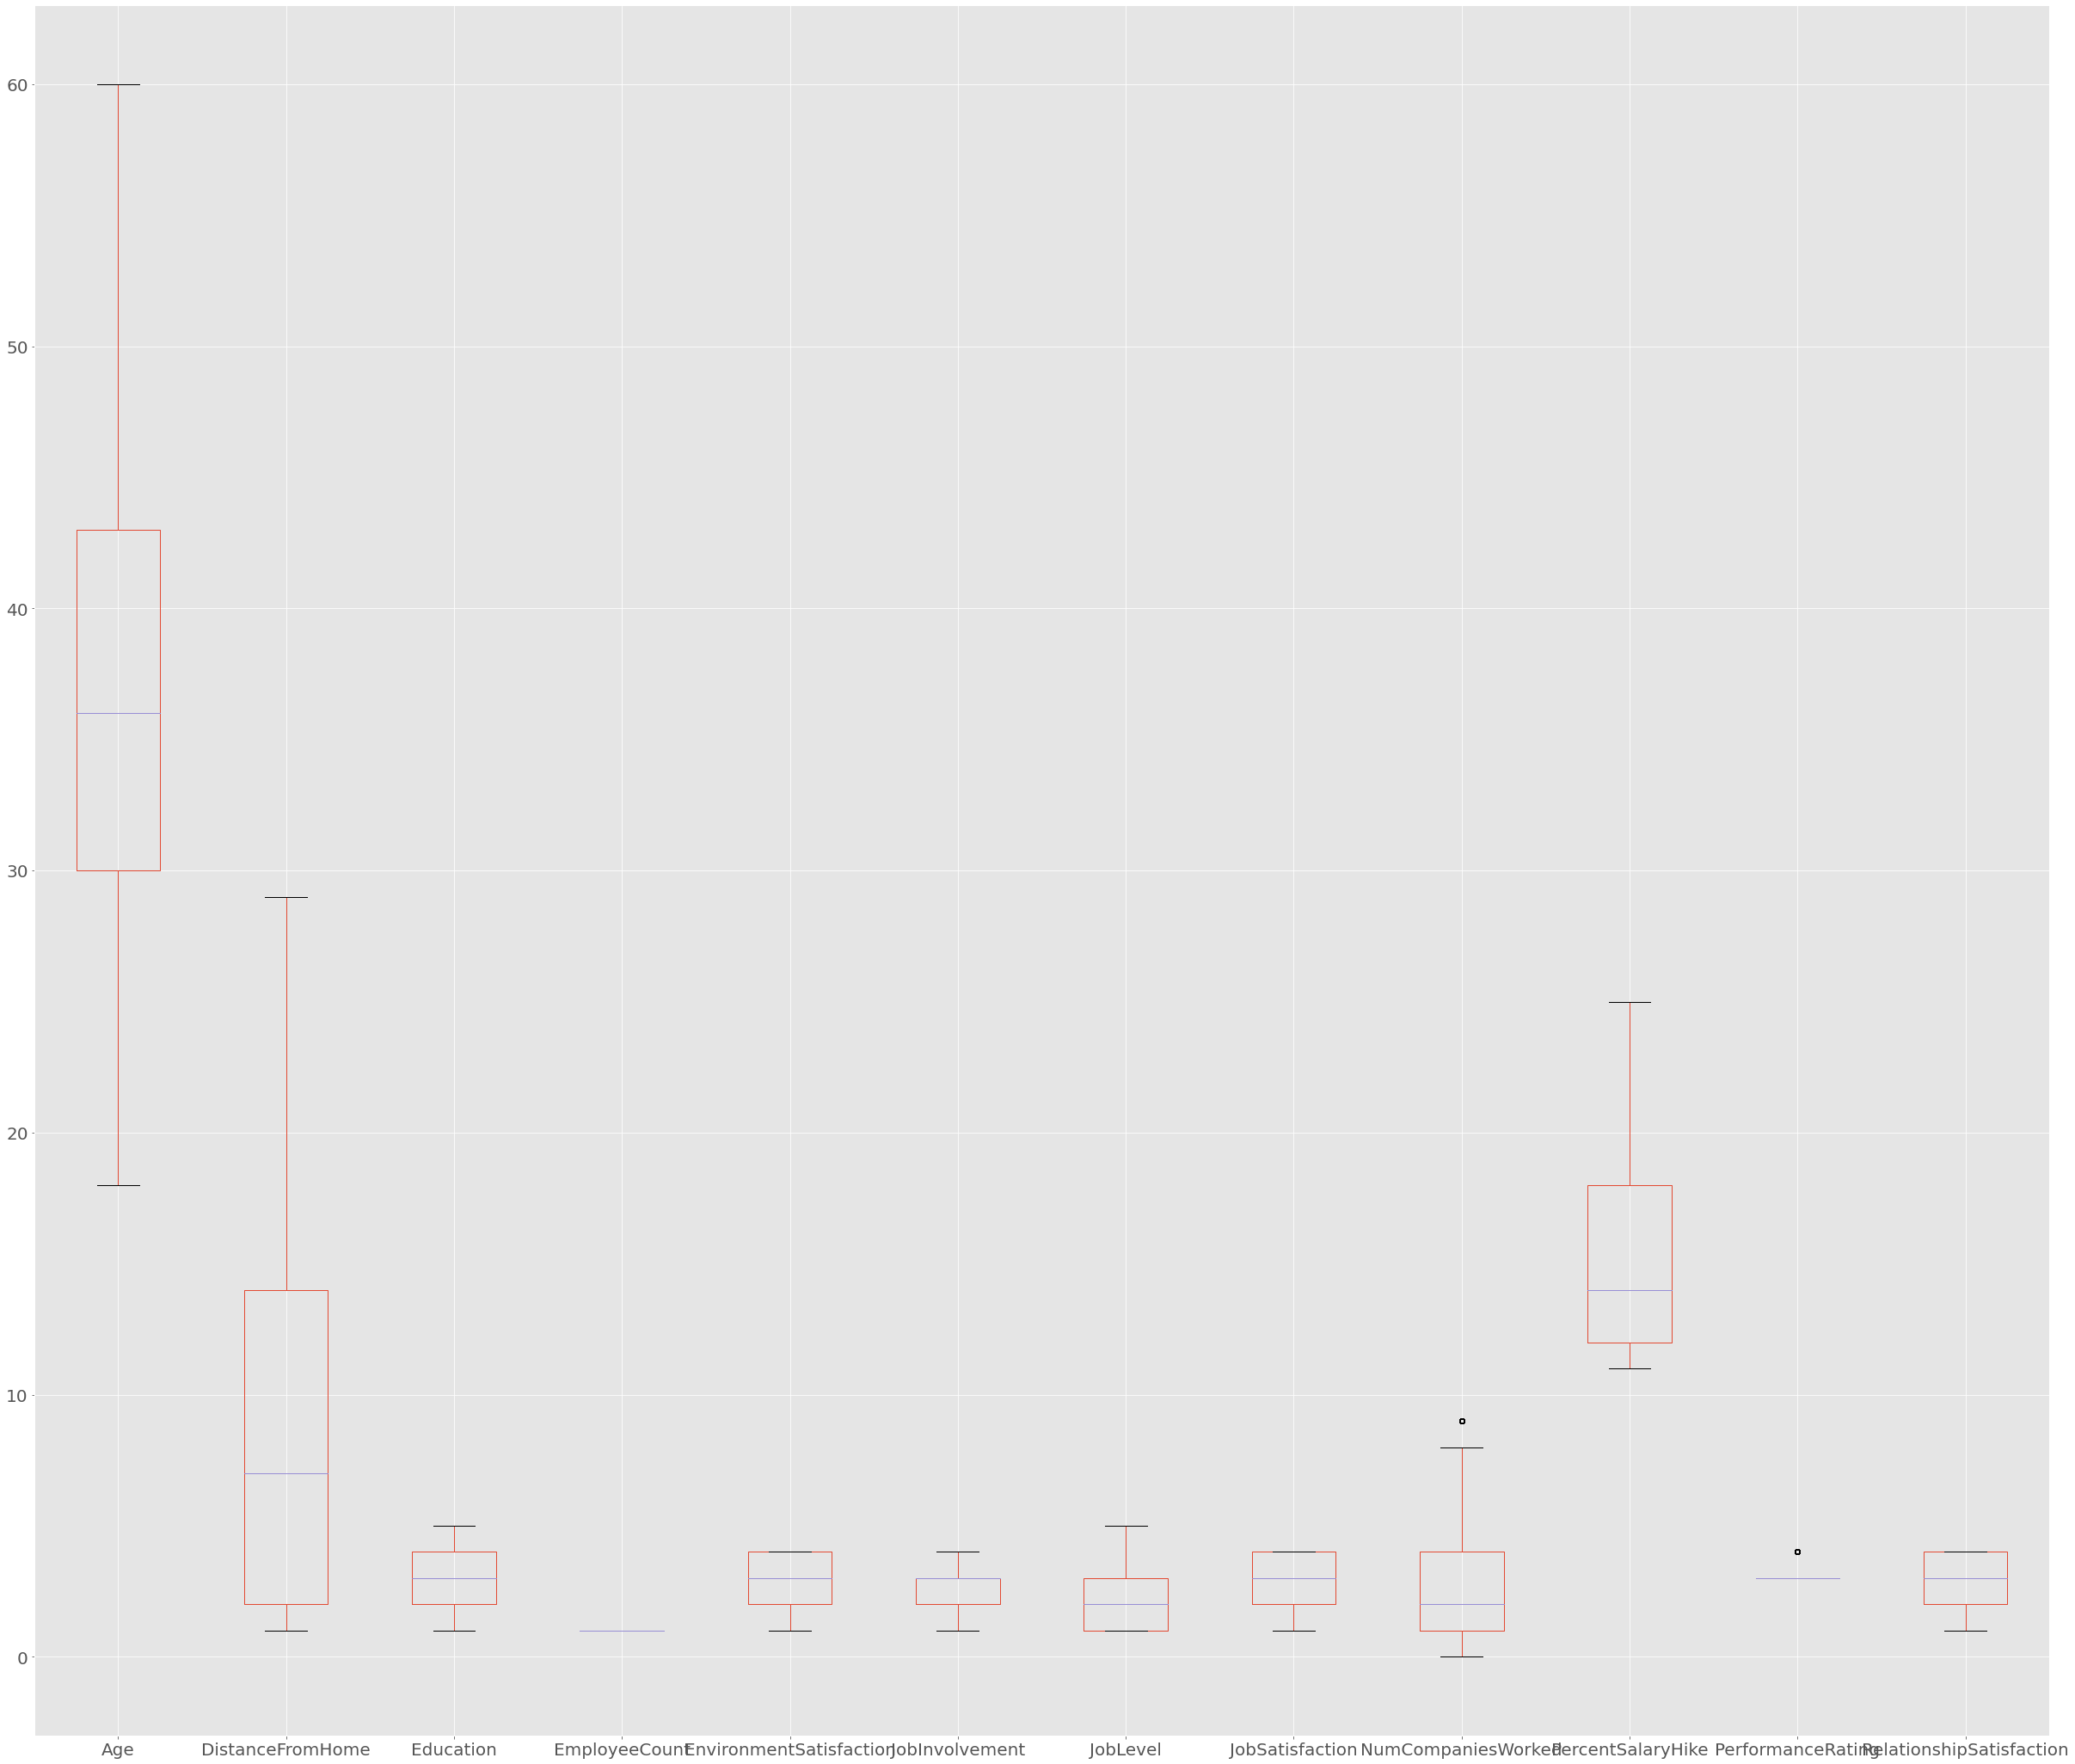

In [90]:
dummy_df.boxplot(column=['Age',
       'DistanceFromHome', 'Education', 'EmployeeCount',
        'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
      'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction'],figsize=(42,37),fontsize=20)

<AxesSubplot:>

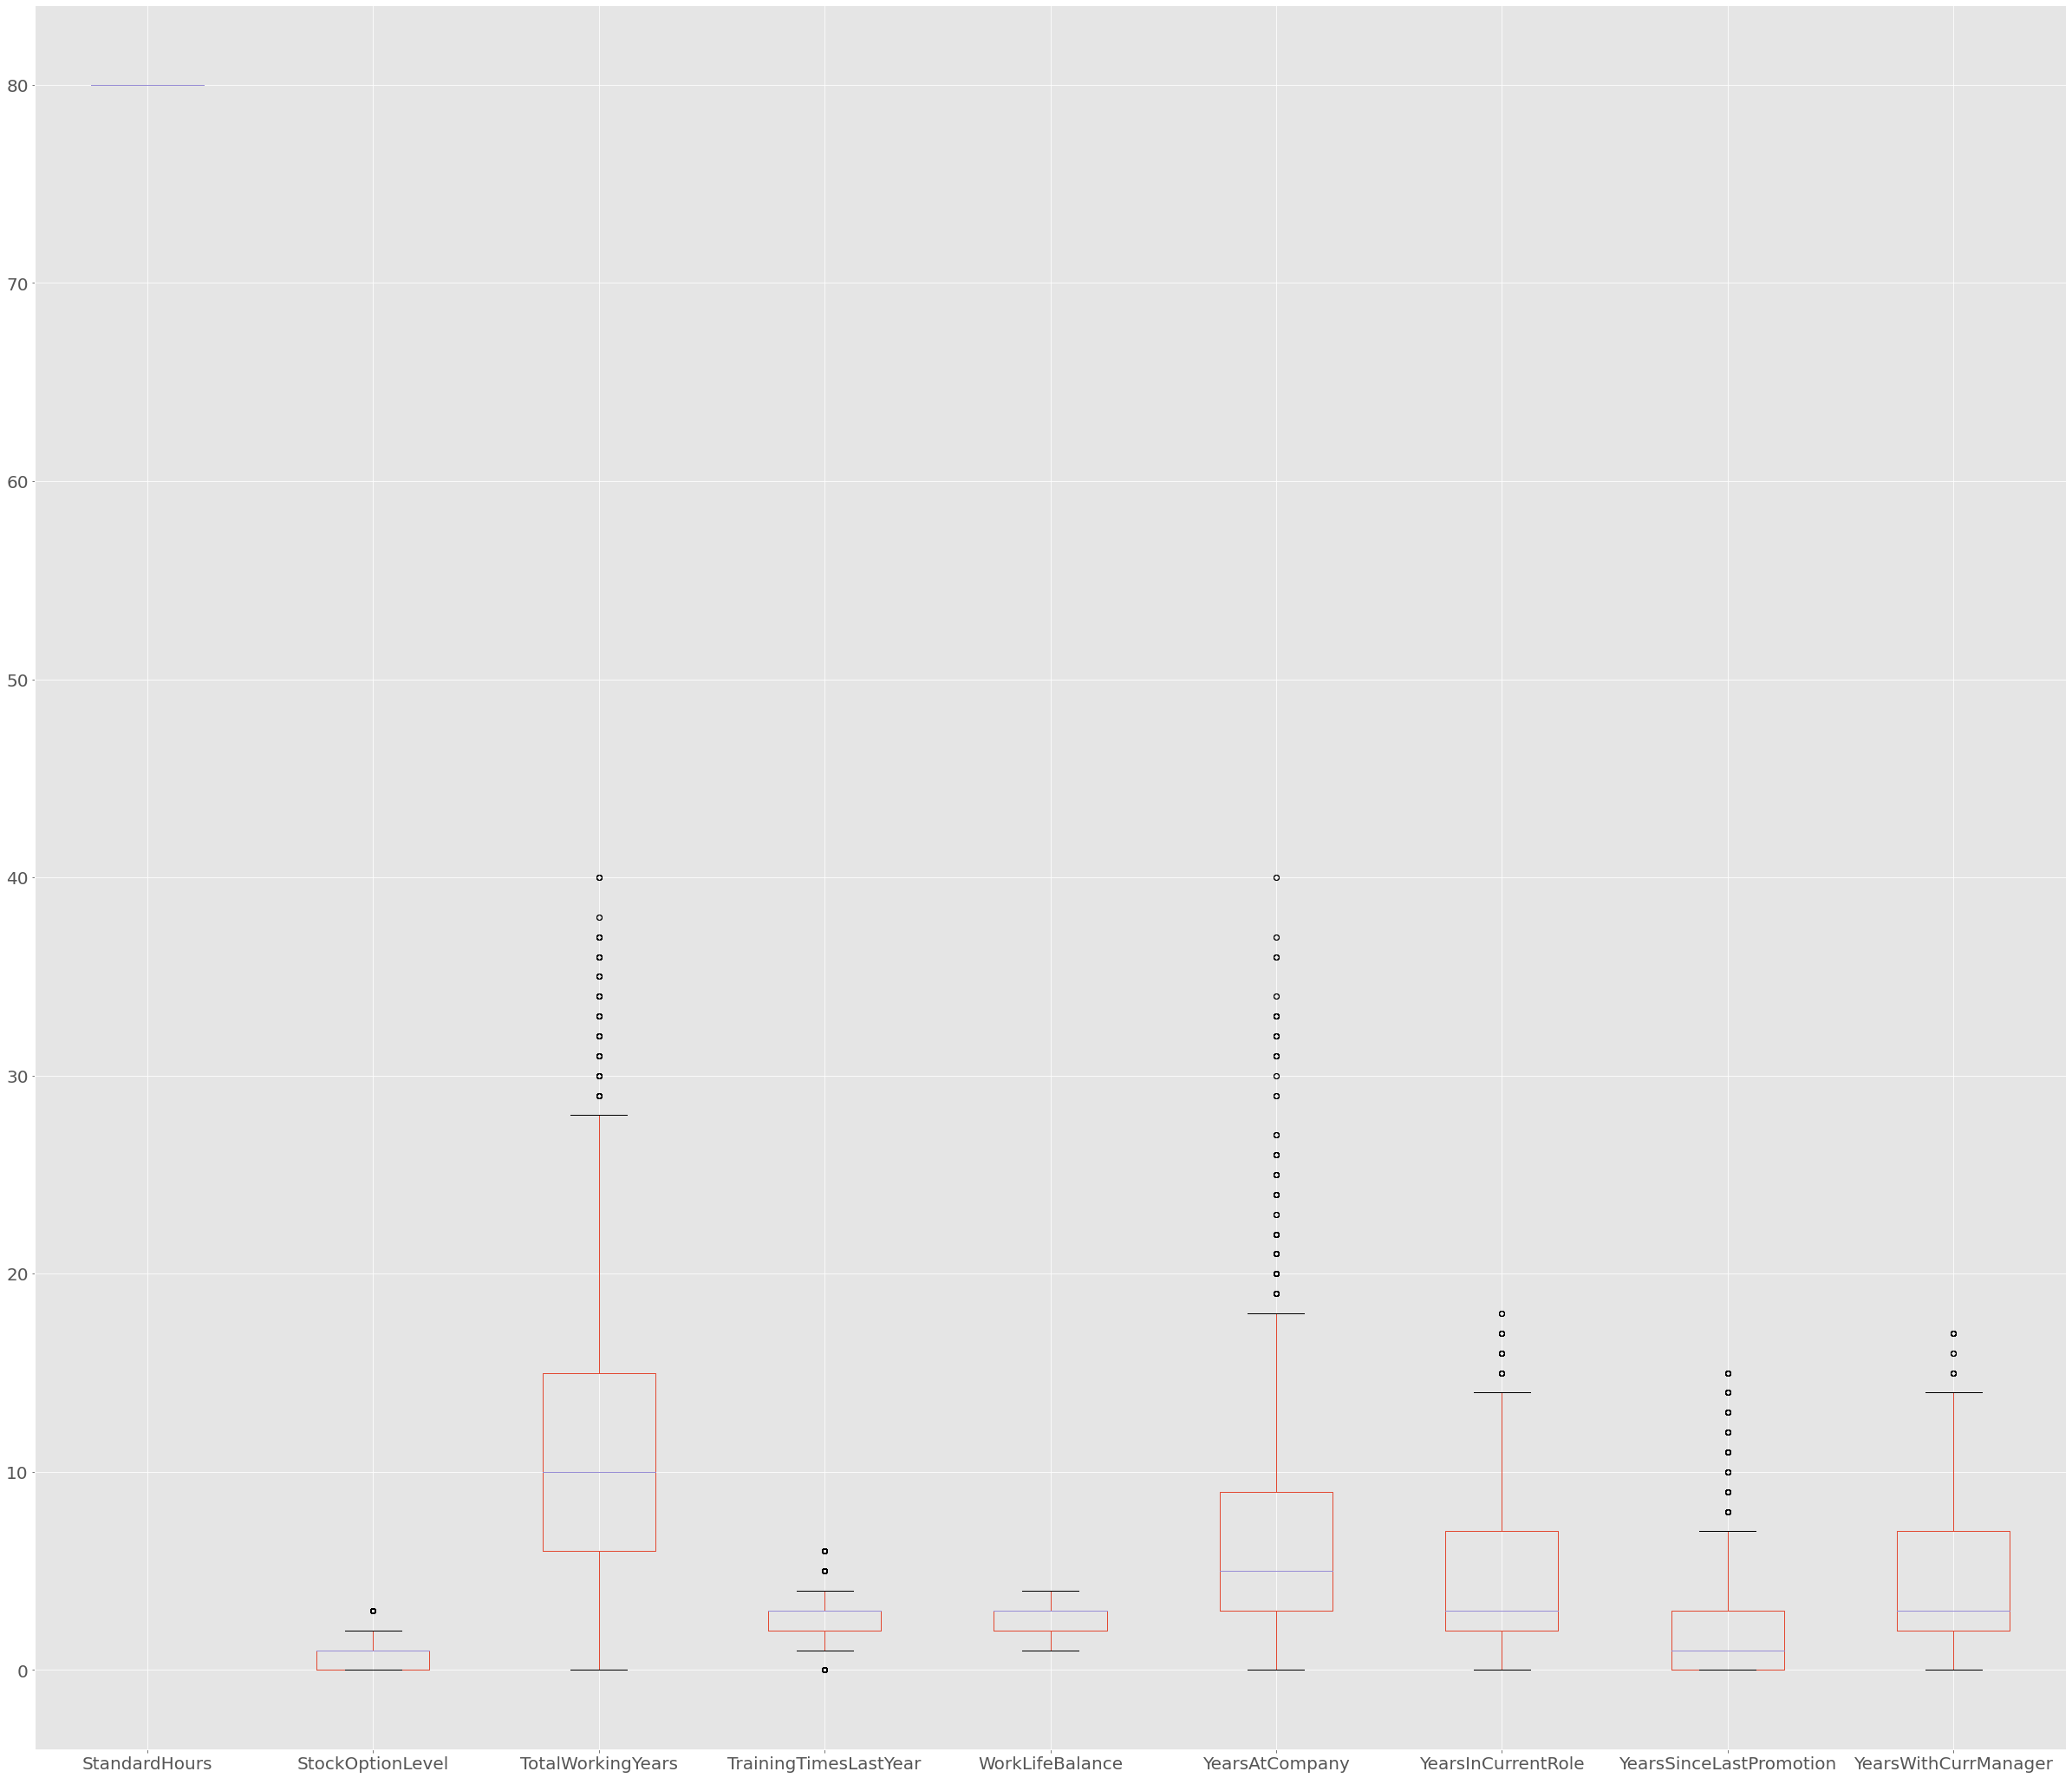

In [91]:
dummy_df.boxplot(column=[ 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],figsize=(42,37),fontsize=20)

<AxesSubplot:>

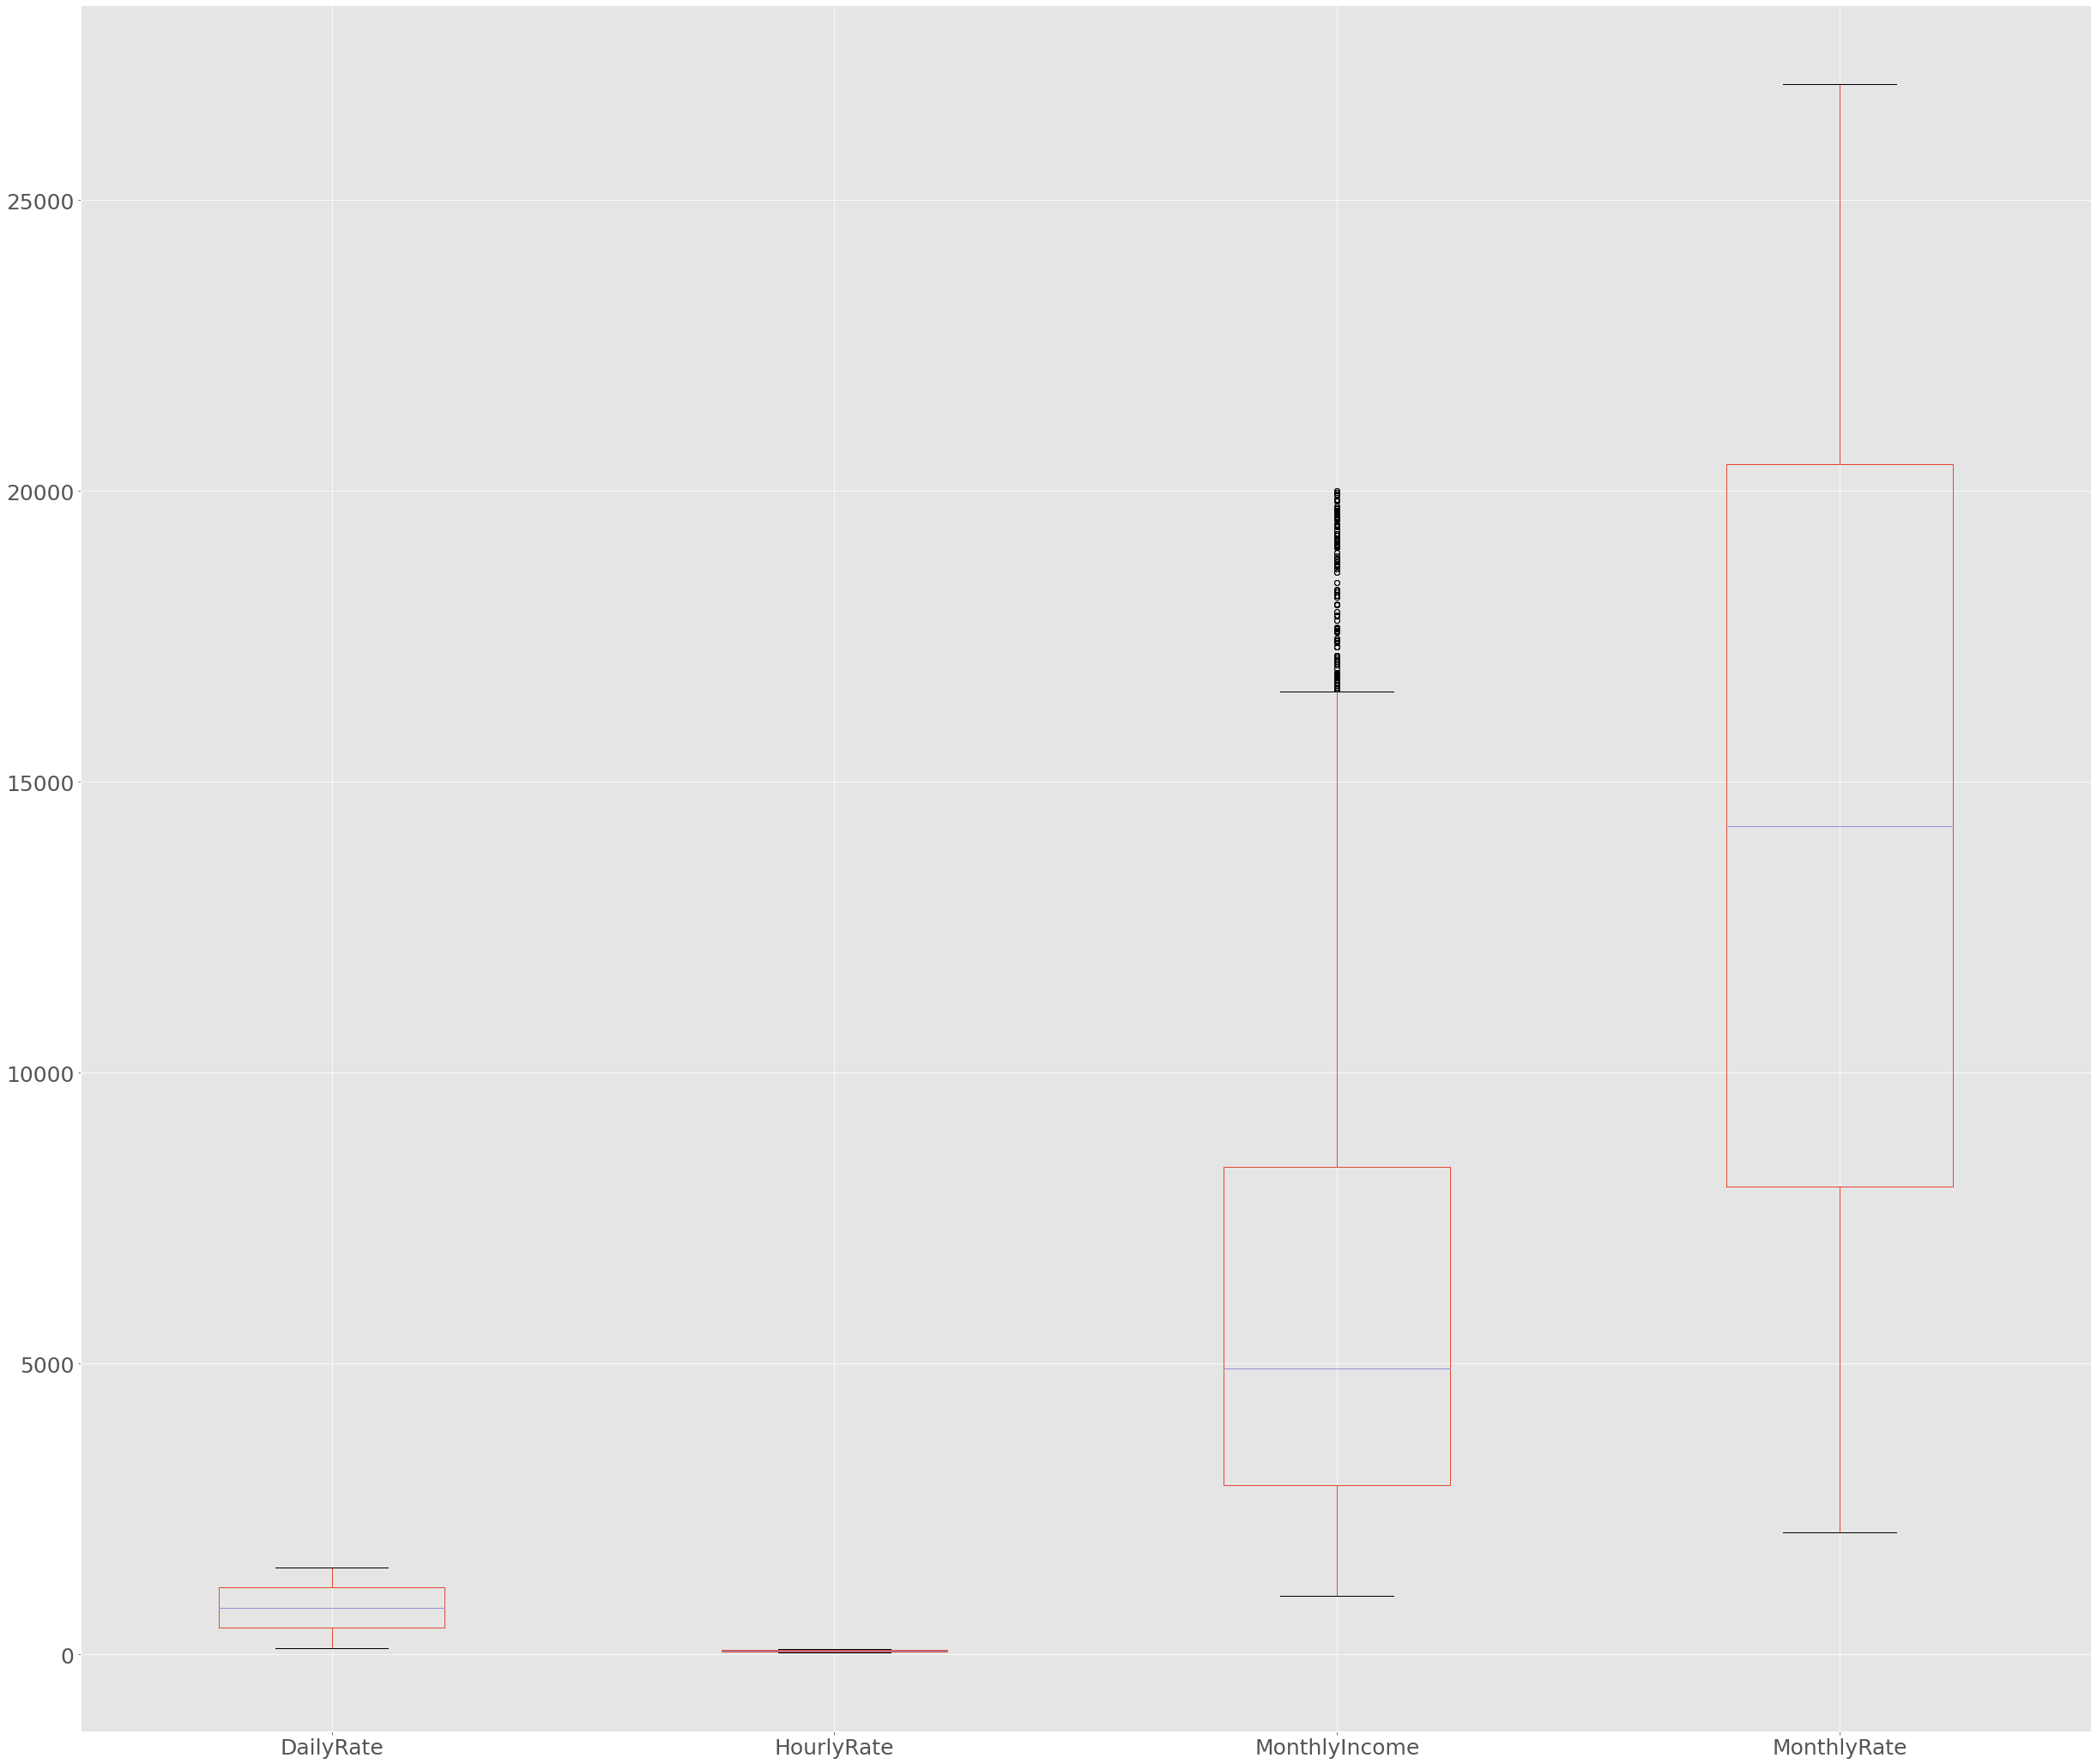

In [92]:
dummy_df.boxplot(column=['DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate'],figsize=(42,37),fontsize=25)
#These columns have values far larger than the values in remaining columns..therefore these are plotted separately

In [93]:
#Outliers:
#'NumCompaniesWorked' >8
#'StockOptionLevel'>3
#'TotalWorkingYears'>25
#'TrainingTimesLastYear' >5
#'YearsAtCompany'>20
#'YearsInCurrentRole'>15
#'YearsSinceLastPromotion'>9
#'YearsWithCurrManager'>15
#'MonthlyIncome'>18000


In [94]:
#'NumCompaniesWorked' >8
lst1=dummy_df[dummy_df.NumCompaniesWorked>8].index

In [95]:
print(lst1)

Int64Index([   4,   38,   50,   95,  105,  122,  194,  198,  208,  245,
            ...
            2505, 2587, 2615, 2632, 2642, 2689, 2732, 2766, 2827, 2912],
           dtype='int64', length=104)


In [96]:
dummy_df.drop(index=lst1,inplace=True)

In [97]:
#'StockOptionLevel'>3
lst1=dummy_df[dummy_df.StockOptionLevel>3].index

In [98]:
print(lst1)

Int64Index([], dtype='int64')


In [99]:
dummy_df.drop(index=lst1,inplace=True)

In [100]:
#'TotalWorkingYears'>25
lst1=dummy_df[dummy_df.TotalWorkingYears>25].index

In [101]:
print(len(lst1))

188


In [102]:
dummy_df.drop(index=lst1,inplace=True)

In [103]:
#'TrainingTimesLastYear' >5
lst1=dummy_df[(dummy_df.TrainingTimesLastYear>5)].index

In [104]:
print(lst1)

Int64Index([  23,   33,   41,  116,  117,  160,  189,  223,  225,  276,
            ...
            2758, 2762, 2856, 2858, 2859, 2867, 2878, 2882, 2895, 2906],
           dtype='int64', length=126)


In [105]:
dummy_df.drop(index=lst1,inplace=True)

In [106]:
#'YearsAtCompany'>20
lst1=dummy_df[dummy_df.YearsAtCompany>20].index

In [107]:
print(lst1)

Int64Index([  28,   45,   90,  119,  178,  231,  244,  257,  300,  311,  314,
             326,  390,  400,  535,  538,  584,  738,  746,  753,  799,  838,
             926, 1096, 1140, 1221, 1223, 1225, 1242, 1295, 1351, 1443, 1498,
            1515, 1560, 1589, 1648, 1701, 1714, 1727, 1770, 1781, 1784, 1796,
            1860, 1870, 2005, 2008, 2054, 2208, 2216, 2223, 2269, 2308, 2396,
            2566, 2610, 2691, 2693, 2695, 2712, 2765, 2821, 2913],
           dtype='int64')


In [108]:
dummy_df.drop(index=lst1,inplace=True)

In [109]:
#'YearsInCurrentRole'>15
lst1=dummy_df[dummy_df.YearsInCurrentRole>15].index

In [110]:
print(lst1)

Int64Index([123, 281, 466, 716, 1327, 1430, 1593, 1751, 1936, 2186, 2797,
            2900],
           dtype='int64')


In [111]:
dummy_df.drop(index=lst1,inplace=True)

In [112]:
#'YearsSinceLastPromotion'>9
lst1=dummy_df[dummy_df.YearsSinceLastPromotion>9].index

In [113]:
print(lst1)

Int64Index([  64,   88,  110,  218,  251,  269,  319,  386,  398,  427,  508,
             526,  695,  701,  729,  750,  752,  813,  875,  937,  951,  978,
            1058, 1078, 1093, 1156, 1348, 1403, 1414, 1447, 1534, 1558, 1580,
            1688, 1721, 1739, 1789, 1856, 1868, 1897, 1978, 1996, 2165, 2171,
            2199, 2220, 2222, 2283, 2345, 2407, 2421, 2448, 2528, 2548, 2563,
            2626, 2818, 2873, 2884, 2917],
           dtype='int64')


In [114]:
dummy_df.drop(index=lst1,inplace=True)

In [115]:
#'YearsWithCurrManager'>15


In [116]:
lst1=dummy_df[dummy_df.YearsWithCurrManager>15].index

In [117]:
print(lst1)

Int64Index([686, 2156], dtype='int64')


In [118]:
dummy_df.drop(index=lst1,inplace=True)

In [119]:
#'MonthlyIncome'>18000

In [120]:
lst1=dummy_df[dummy_df.MonthlyIncome>18000].index

In [121]:
print(lst1)

Int64Index([  29,  165,  186,  329,  392,  417,  568,  741,  814,  869,  898,
             899,  904,  936,  955, 1129, 1277, 1330, 1437, 1499, 1635, 1656,
            1799, 1862, 1887, 2038, 2211, 2284, 2339, 2368, 2369, 2374, 2406,
            2425, 2599, 2747, 2800, 2907],
           dtype='int64')


In [122]:
dummy_df.drop(index=lst1,inplace=True)

In [123]:
dummy_df.shape #From 2940 we have reached at 2346 number of rows after outlier removal

(2346, 34)

In [48]:
#Ok done with outlier removal..still need to master this step

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

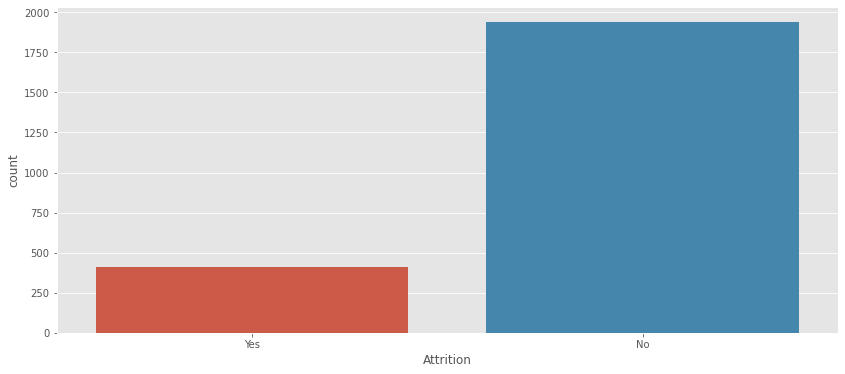

In [124]:
#plot the count of attrition after removal of outliers ..with outliers we had 500 Attrition
plt.figure(figsize=(14,6))
sns.countplot('Attrition',data=dummy_df)

# Boxplots after removal of outliers

<AxesSubplot:>

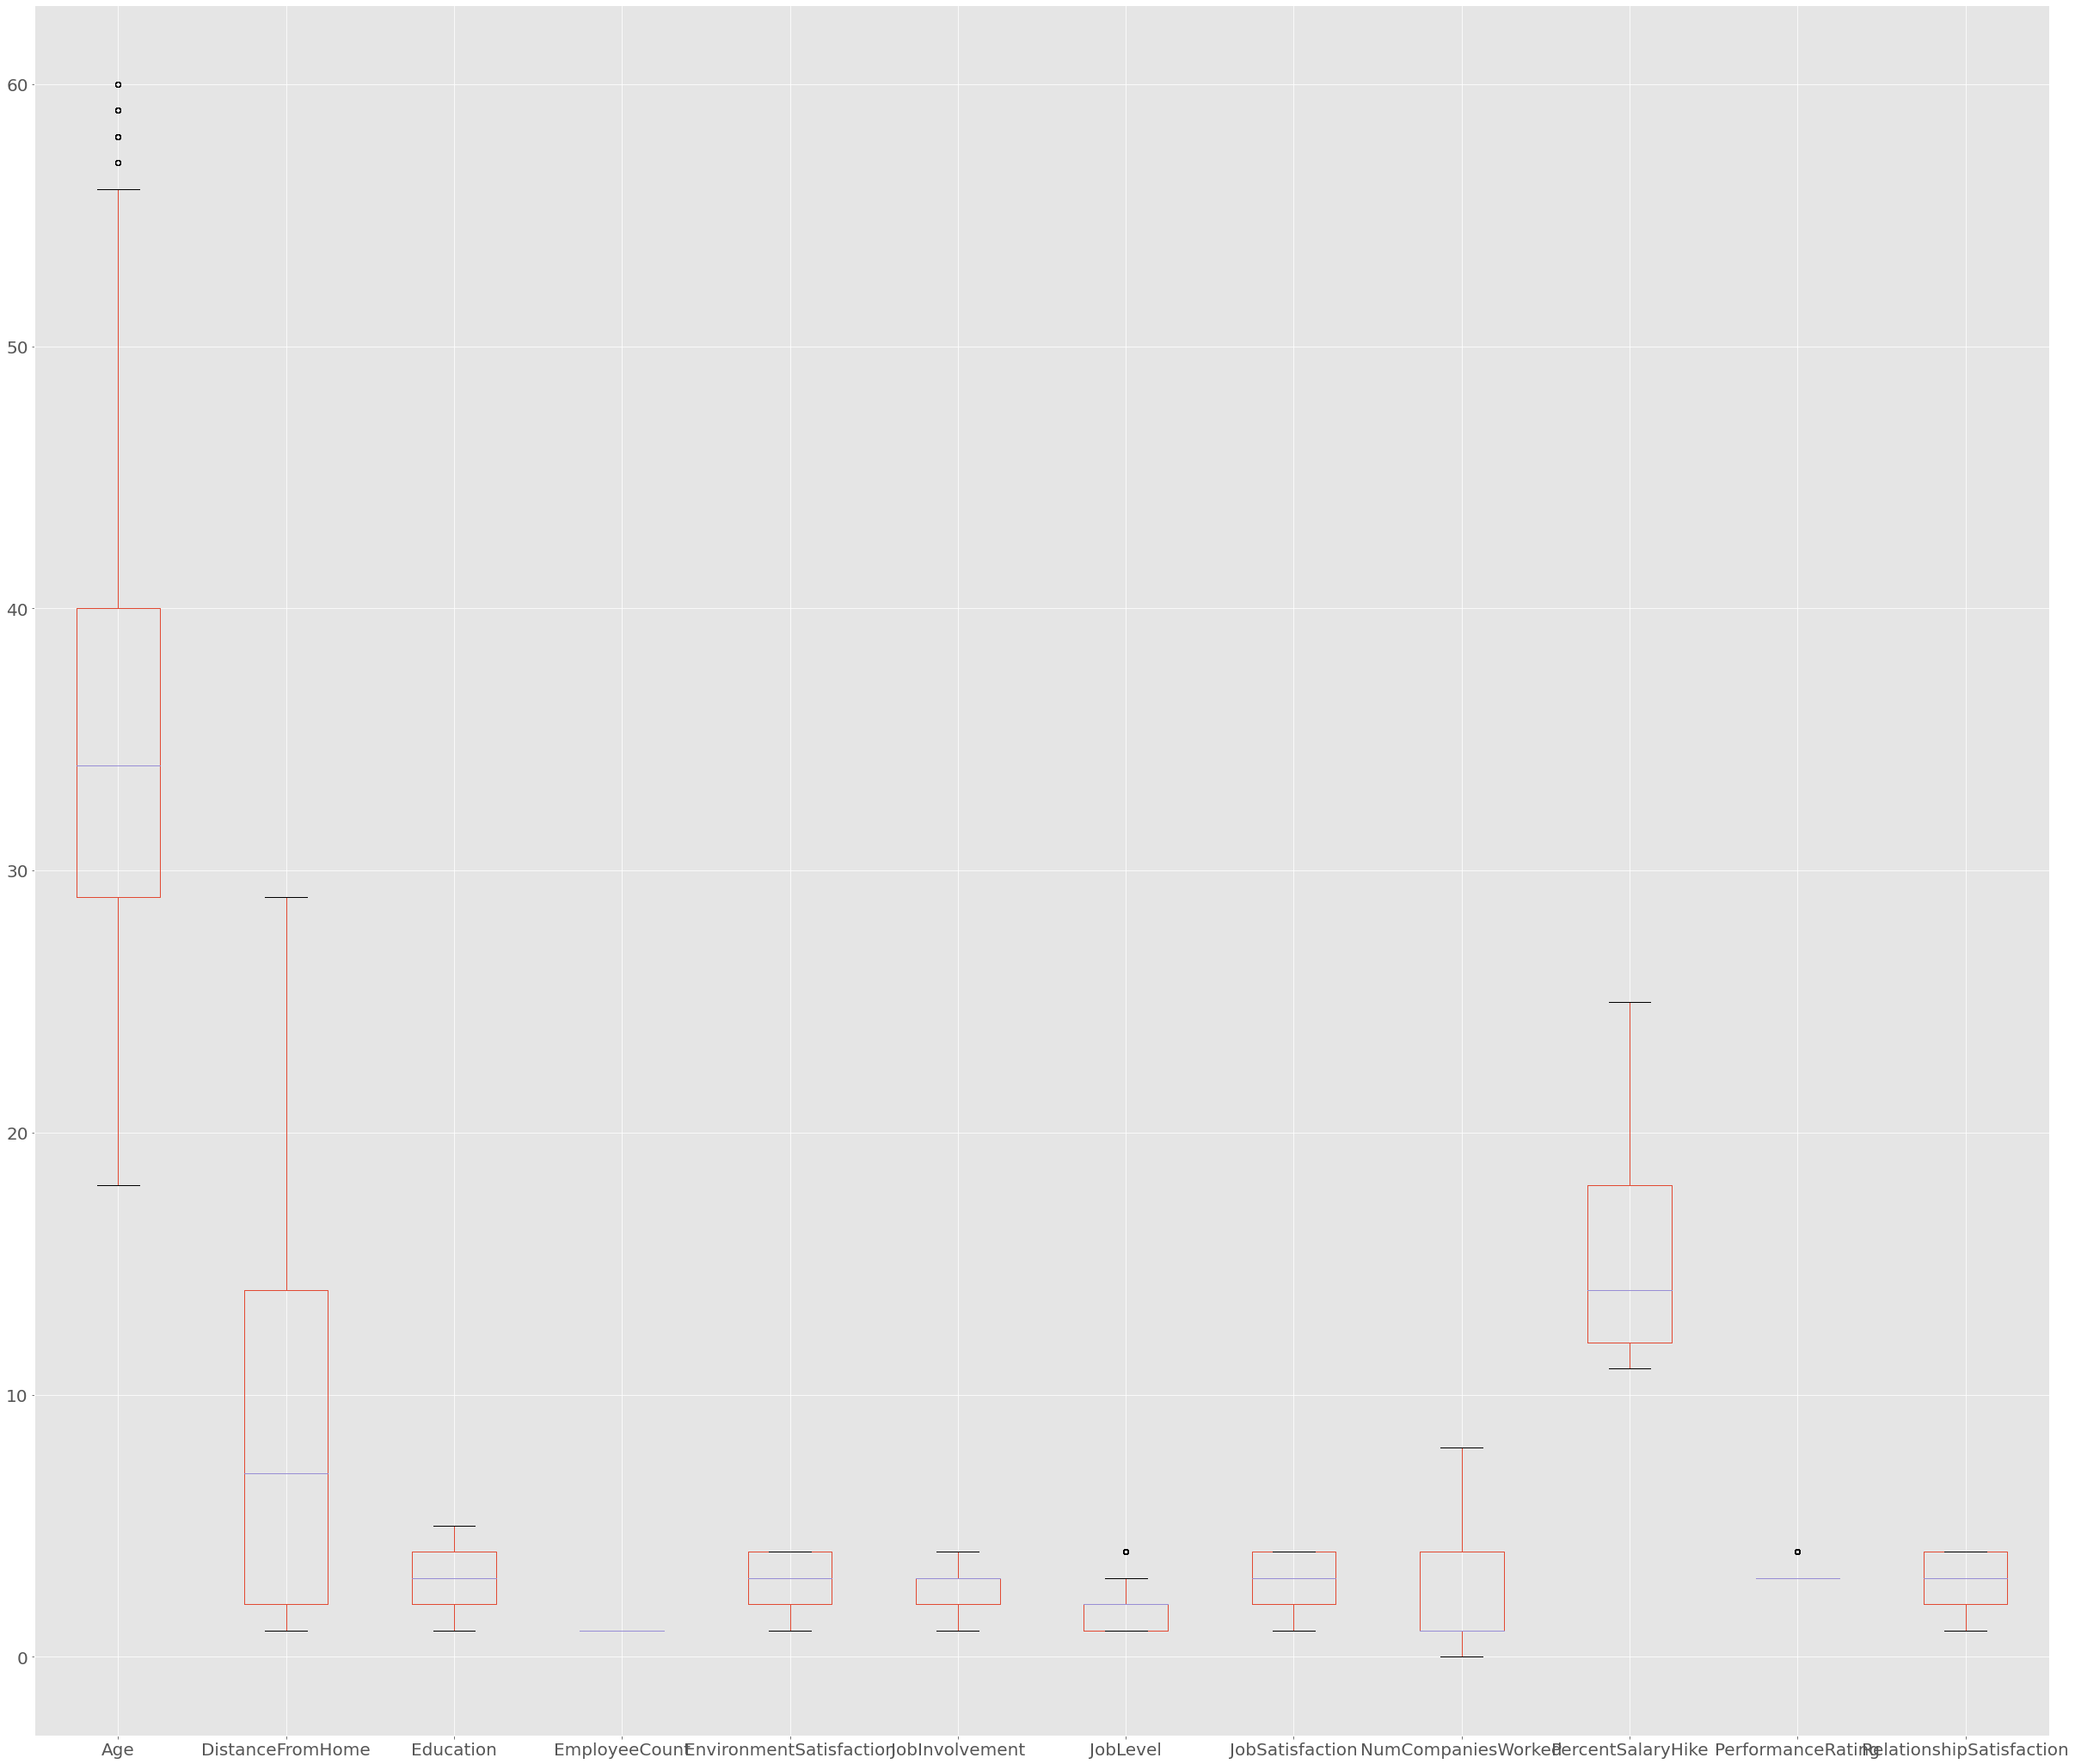

In [125]:
dummy_df.boxplot(column=['Age',
       'DistanceFromHome', 'Education', 'EmployeeCount',
        'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
      'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction'],figsize=(42,37),fontsize=20)

<AxesSubplot:>

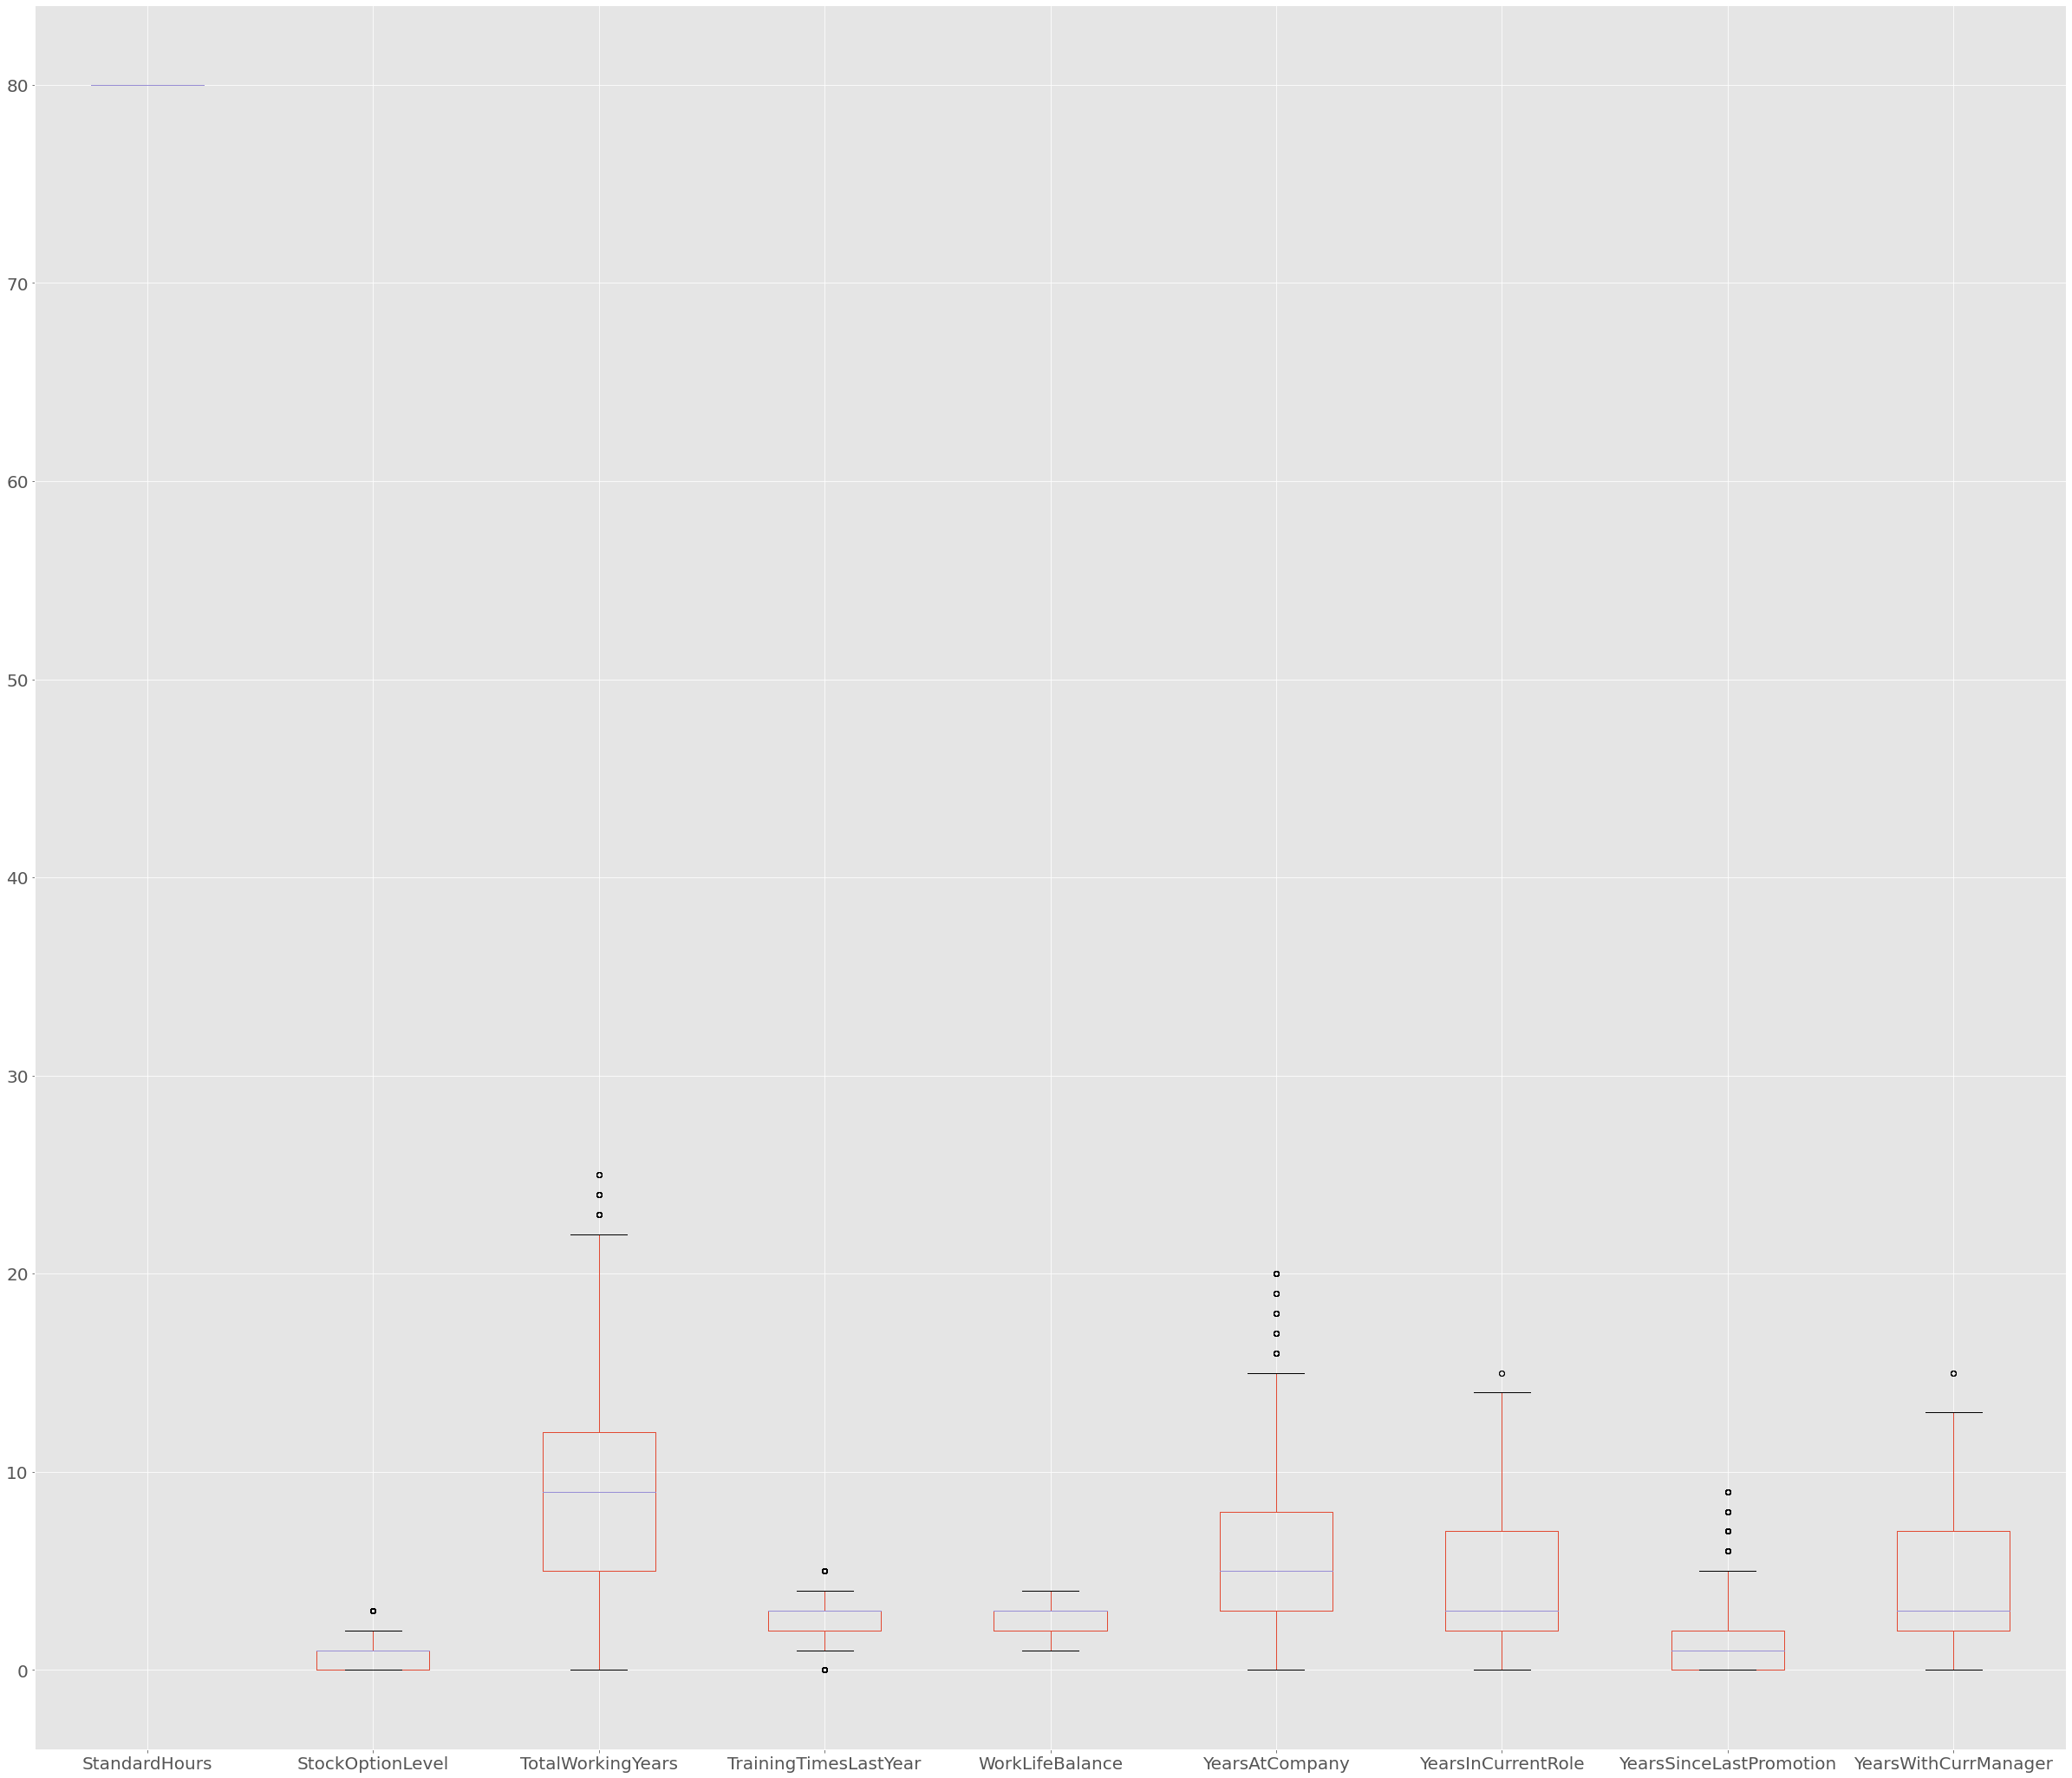

In [126]:
dummy_df.boxplot(column=[ 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],figsize=(42,37),fontsize=20)

<AxesSubplot:>

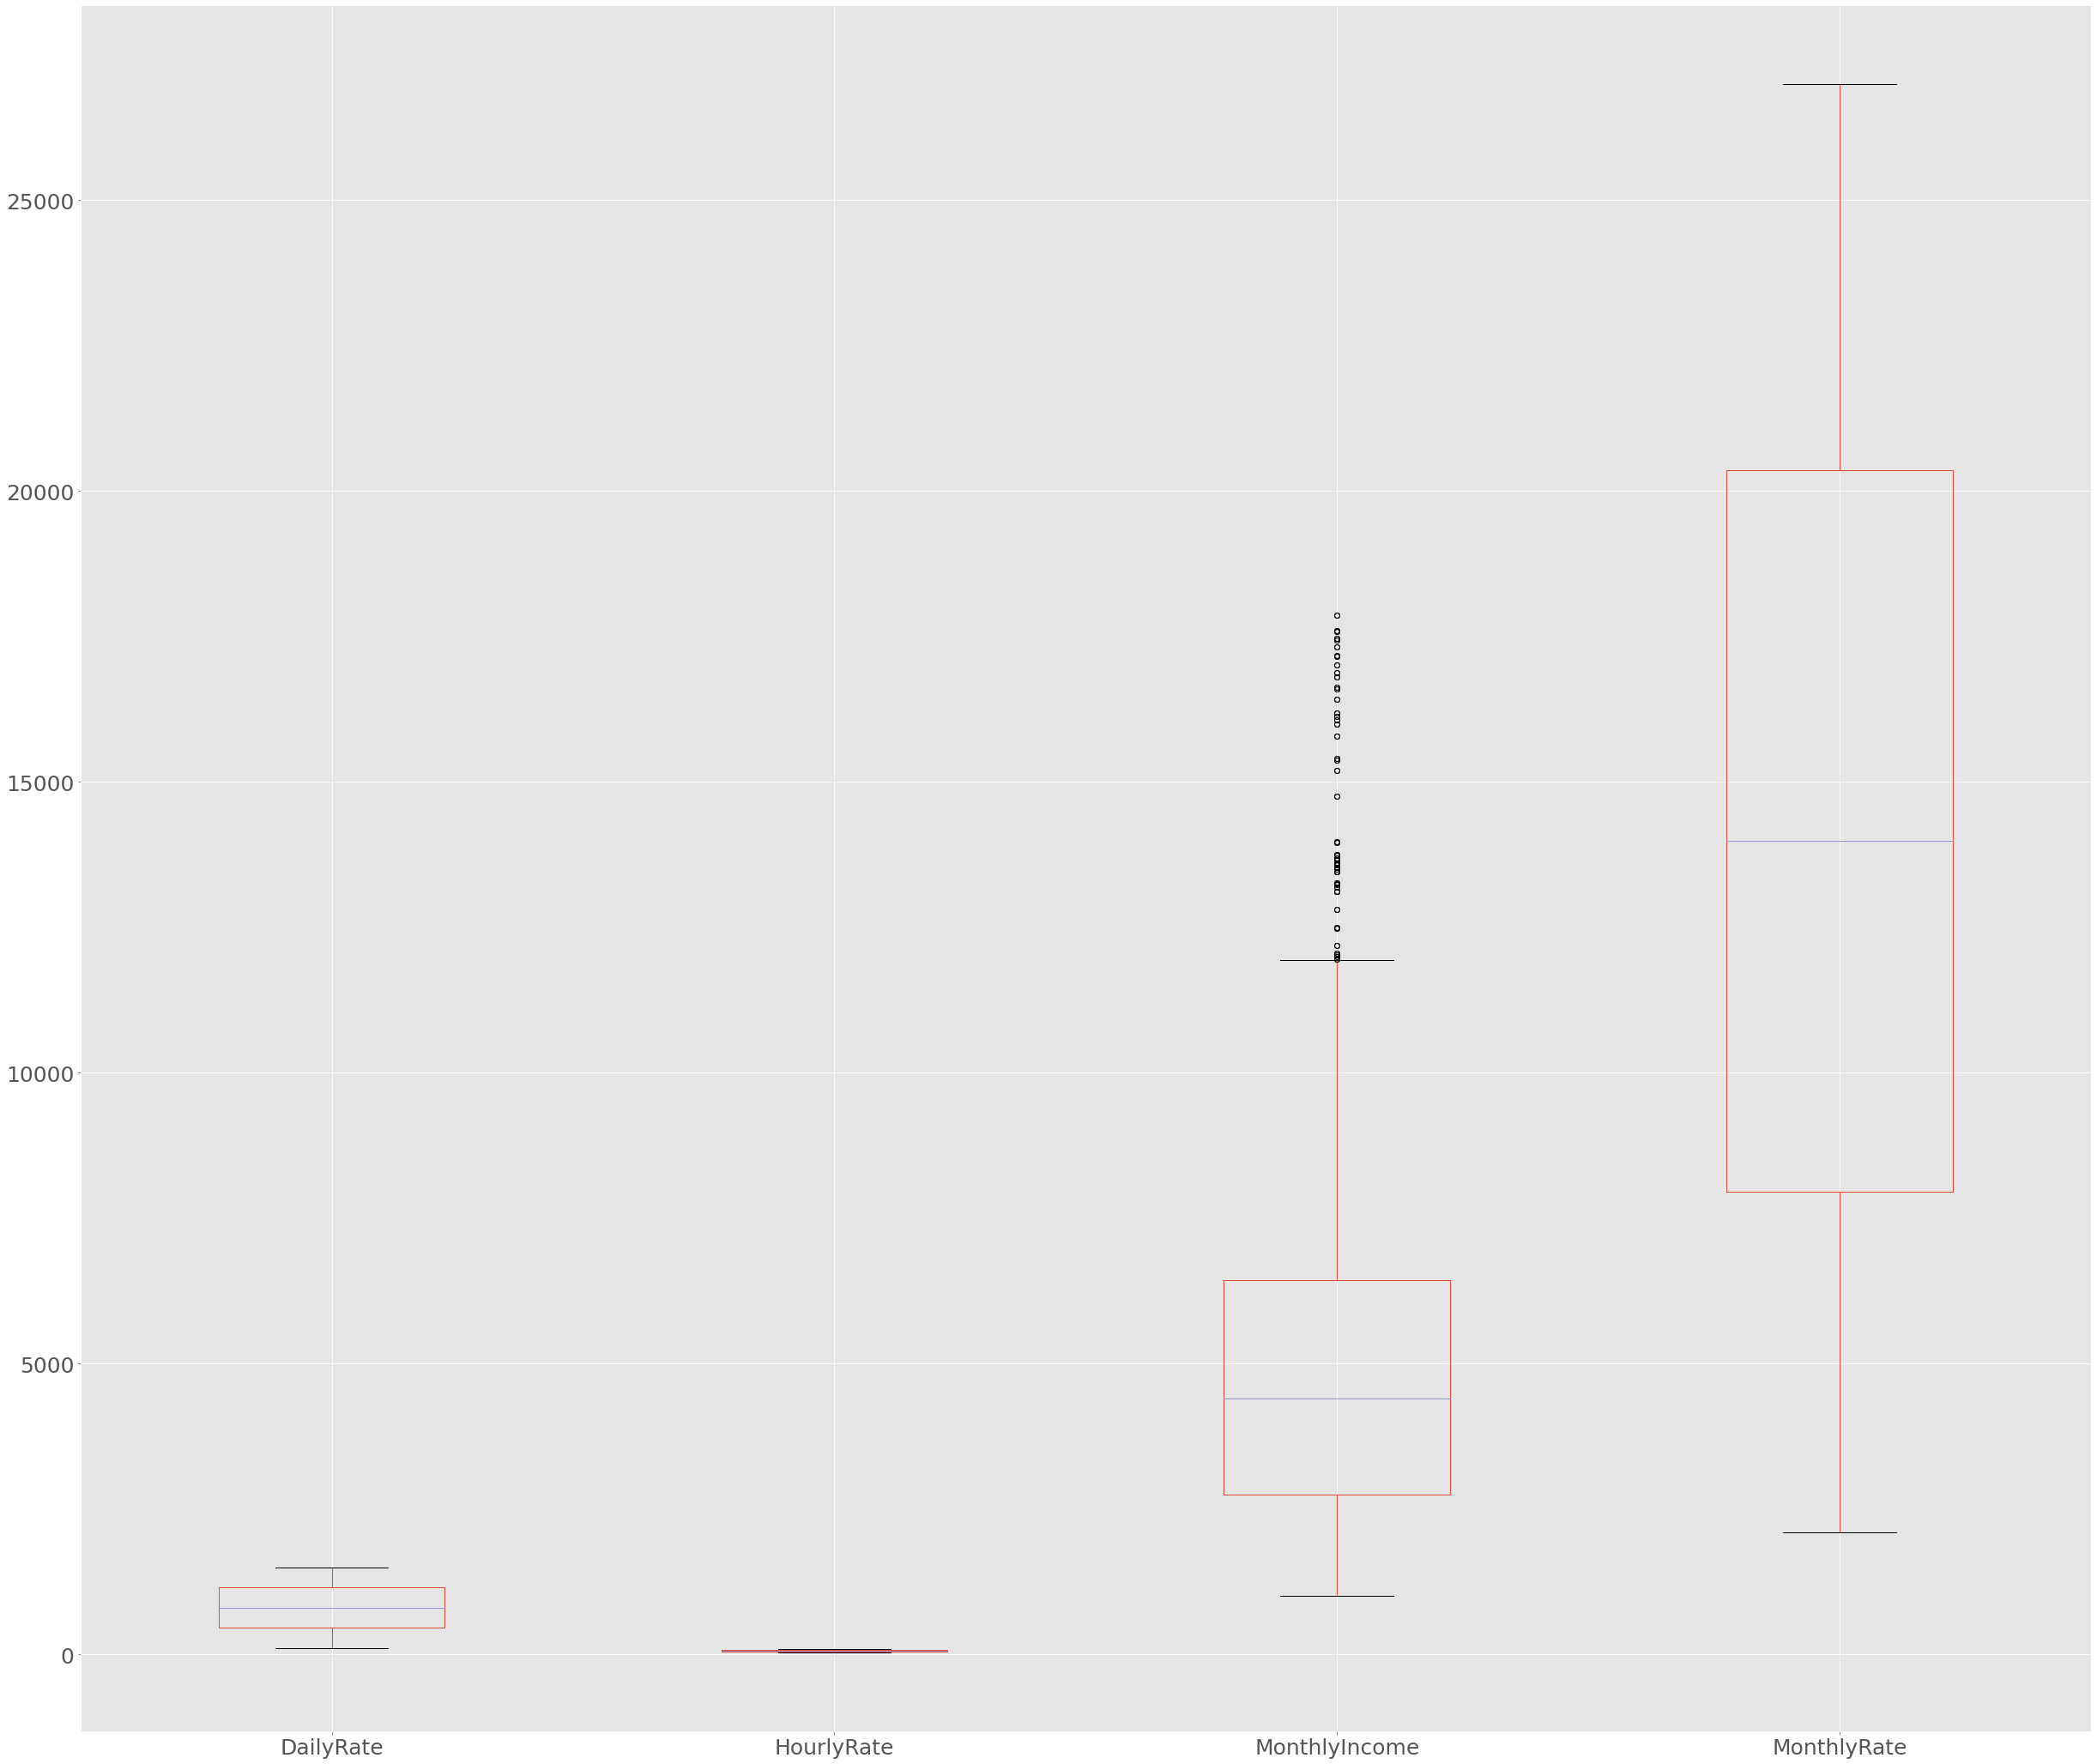

In [127]:
dummy_df.boxplot(column=['DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate'],figsize=(42,37),fontsize=25)
#These columns have values far larger than the values in remaining columns..therefore these are plotted separately

In [128]:
dummy_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
5                 2          2  Life Sciences              1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
5                        4    Male          79               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
5  Laboratory Technician                4        Single           3068   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
5        11864                   0      Y       No                 13   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
5                  3                         3             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
5                 0                  8                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
5                2               7                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
5                        3                     6

In [129]:
dummy_df['Attrition'] = dummy_df['Attrition'].map({'Yes':1, 'No':0}) #changing yes to 1 and no to 0 under Attrition column

In [130]:
#now lets convert non numeric data to numeric and then check for variance and corr
#.....and see if further elimination can be done

In [131]:
dummy_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [132]:
contact_df = dummy_df

In [133]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Over18'] = le.fit_transform(res_df['Over18'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    return res_df

In [134]:
encoded_df = preprocessor(contact_df)

In [135]:
#variance
encoded_df.std() #looking at the values theres no zero or near zero column..therefore no elimination

Age                            8.407917
Attrition                      0.379115
BusinessTravel                 0.665364
DailyRate                    401.748394
Department                     0.531083
DistanceFromHome               8.168529
Education                      1.024643
EducationField                 1.344107
EmployeeCount                  0.000000
EnvironmentSatisfaction        1.089355
Gender                         0.487374
HourlyRate                    20.385812
JobInvolvement                 0.718166
JobLevel                       0.789336
JobRole                        2.514576
JobSatisfaction                1.105073
MaritalStatus                  0.730988
MonthlyIncome               3156.302874
MonthlyRate                 7090.117437
NumCompaniesWorked             2.224588
Over18                         0.000000
OverTime                       0.454968
PercentSalaryHike              3.636035
PerformanceRating              0.364552
RelationshipSatisfaction       1.084871


In [136]:
#Columns with var=0 -->StandardHours,Over18,EmployeeCount,
#therfore these columns need to be dropped

In [137]:
encoded_df.drop(columns=['StandardHours','Over18','EmployeeCount'],inplace=True)

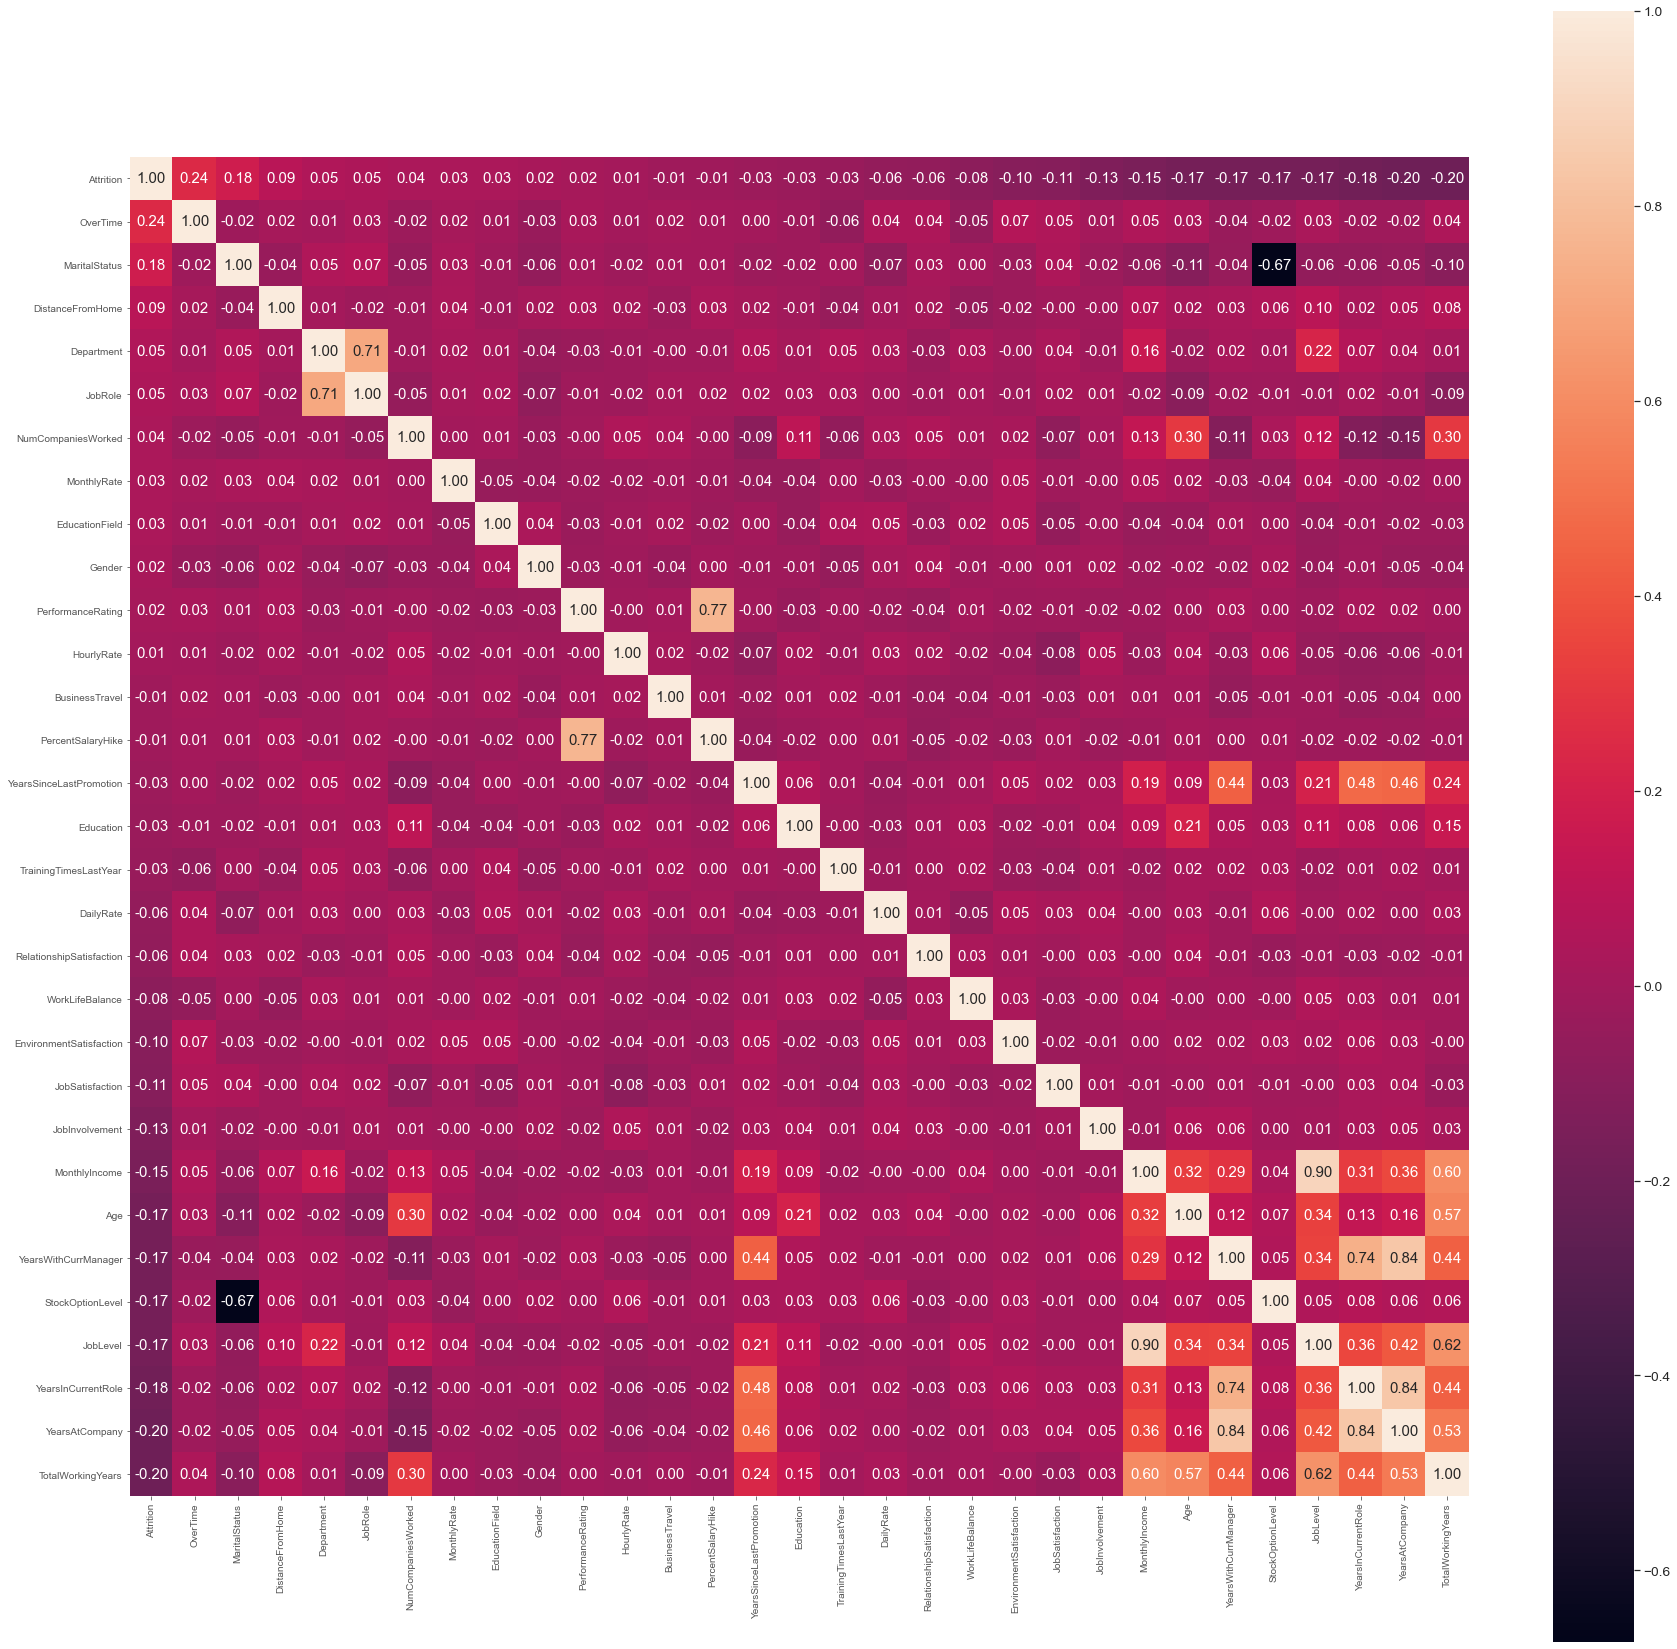

In [138]:
import seaborn as sns
#deposit correlation matrix
corrmat=encoded_df.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
k=31 #no. of variables for heatmap
cols=corrmat.nlargest(k,'Attrition')['Attrition'].index
cm=np.corrcoef(encoded_df[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},
              yticklabels=cols.values,xticklabels=cols.values,ax=ax)
plt.show()

In [139]:
#Columns to be eliminated:PerformanceRating,YearsWithCurrManager,
#YearsInCurrentRole,MonthlyIncome since corr values>.75(+/-)

In [140]:
encoded_df.drop(columns=['PerformanceRating','YearsWithCurrManager','YearsInCurrentRole','MonthlyIncome'],inplace=True)

In [141]:
encoded_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

In [142]:
x = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2) #splitting data into train and test

# Creating Decision Tree Object

In [144]:
fit_dt = DecisionTreeClassifier(random_state=42)

In [145]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10,12,15,13,17,18,22,25],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(fit_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 4)

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 17}
Time taken in grid search:  20.37


In [146]:
# Set best parameters given by grid search 
fit_dt.set_params(criterion = 'gini',max_depth = 17)

DecisionTreeClassifier(max_depth=17, random_state=42)

In [147]:
fit_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=17, random_state=42)

In [148]:
predictions_dt = fit_dt.predict(x_test)

# Performance Matrix

In [149]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Variable Importance

In [150]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [151]:
var_imp_rf = variable_importance(fit_dt)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

Model entered does not contain 'estimators_' attribute.


In [152]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

In [153]:
# For later use in CART models
names_index = list(encoded_df.columns)
names_index.remove('Attrition')

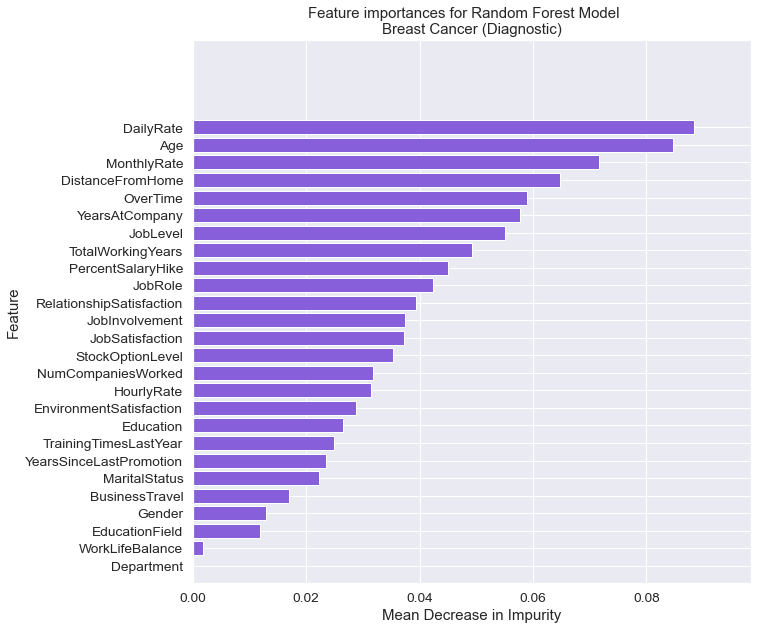

In [154]:
variable_importance_plot(importances_rf, indices_rf, names_index)

# Area Under Curve(AUC)

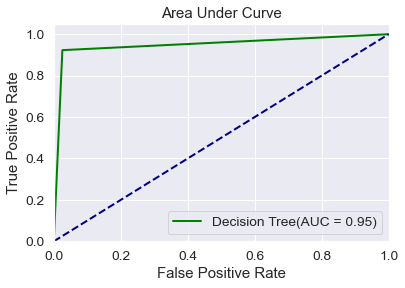

In [155]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [156]:
#AUC should be near 1

# Confusion Matrix

In [157]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

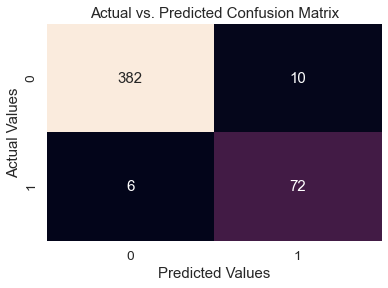

In [158]:
conf_mat = create_conf_mat(y_test, predictions_dt)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [159]:
accuracy_dt = fit_dt.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_dt))

Here is our mean accuracy on the test set:
 0.966


In [160]:
# Here we calculate the test error rate!
test_error_rate_dt = 1 - accuracy_dt
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_dt))

The test error rate for our model is:
  0.0340


In [161]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = ['Attrition-NO','Attrition-YES']))

# Report

In [162]:
class_report = print_class_report(predictions_dt, 'Decision tree')

Classification Report for Decision tree:
               precision    recall  f1-score   support

 Attrition-NO       0.97      0.98      0.98       388
Attrition-YES       0.92      0.88      0.90        82

     accuracy                           0.97       470
    macro avg       0.95      0.93      0.94       470
 weighted avg       0.97      0.97      0.97       470



# Accuracy of the model =97%

# Create a csv file for x_test,y_test,y_predictions

In [93]:
predictions = fit_dt.predict(x_test)


In [94]:
data=pd.concat([pd.DataFrame(x_test),pd.Series(y_test),pd.Series(predictions)],axis=1)


In [95]:
lst1=list(encoded_df.columns)

In [96]:
lst1.remove('Attrition')

In [97]:

lst1.append('y_test')
lst1.append('predictions')
lst1

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'y_test',
 'predictions']

In [98]:
data.columns=lst1

In [99]:
data.to_csv('CART_CAPSTONE.csv',index=False)

# Prepare a model for the HR department to predict the Attrition and give the insights from the data
#about the important factors associated with the attrition so that HR can take the corrective or
#previntive measures to stop or control the attrition.

In [ ]:
#Important Features in Attrition decision as per the Decision Tree Model are:
#'TotalWorkingYears','Age','DistanceFromHome', 'HourlyRate','Overtime','DailyRate','EnvironmentSatisfaction','NumCompaniesWorked',
#'JobSatisfaction','MonthlyRate','YearsSinceLastPromotion'

In [163]:
Insights from the data(These are separately mentioned in the text file mailed along with the submission):


In [ ]:
#Features or columns that are correlated:
#1.'PerformanceRating' and 'SalaryHikePercentage'
#2.'YearsWithCurrManager' and 'TotalYearsAtCompany'
#3.'YearsInCurrentRole' and 'YearsWithCurrManager'
#4.'MonthlyIncome' and 'JobLevel'
#Therefore dropped columns such that correlation among independent variables is removed

In [ ]:
#**********THANKS UTKARSH SIR*********************************************************************************